# TP3 - Machine Learning
El objetivo de este trabajo es desarrollar y evaluar modelos basados en redes neuronales,incorporando técnicas de ablación para entender el impacto de diversas modificaciones en el proceso de entrenamiento y en la capacidad de generalización del modelo. No se permite usar librerías de machine learning como scikit-learn o PyTorch, a menos que sea pedido explícitamente en el enunciado del ejercicio.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

In [82]:
import sys
import os
np.random.seed(122404)
# sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/src'))

In [83]:
import models as md
importlib.reload(md)
import data_splitting as ds
importlib.reload(ds)
import metricas as mt
importlib.reload(mt)
import auxiliares as aux
importlib.reload(aux)

<module 'auxiliares' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP3\\src\\auxiliares.py'>

In [84]:
# Cargar los archivos .npy
X_COMP = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_COMP.npy')
X_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_images.npy')
y_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/y_images.npy')

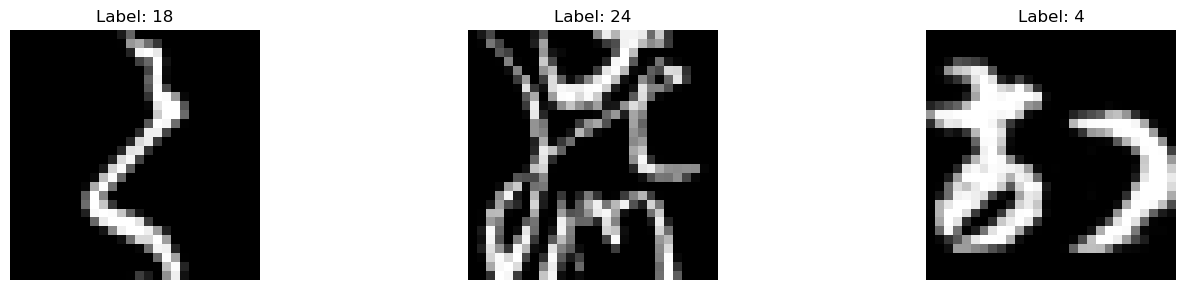

In [ ]:
num_images_to_display = 3
random_indices = np.random.choice(len(X_images), num_images_to_display, replace=False)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_images[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Dividir el conjunto de datos en tres subconjuntos: Train, Validation y Test

In [ ]:
importlib.reload(ds)

X_train, X_val, X_test, y_train, y_val, y_test = ds.split_data(X_images, y_images)
X_train = ds.normalize(X_train)  # Normaliza train
X_val = ds.normalize(X_val)      # Aplica misma normalización a val
X_test = ds.normalize(X_test)

has_duplicates = np.any([np.array_equal(x, y) for x in X_train for y in X_val])
print(f"Hay muestras repetidas entre X_train y X_val? {has_duplicates}")


print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")



Hay muestras repetidas entre X_train y X_val? False
X_train shape: (3000, 784)
X_val shape: (1000, 784)
X_test shape: (1000, 784)


### 2) Implementación y Entrenamiento de una Red Neuronal Básica
- Implementar una red neuronal con L capas ocultas cada con M(l) nodos con función de activación ReLU (en las capas ocultas) y activación softmax para la capa de salida.
- Implementar un algoritmo para entrenar dicha red, mediante backpropagation y gradiente descendiente estándar, utilizando como función de costo la cross-entropy.

NOTA: El algoritmo backpropagation debe sera adaptado para el caso de clasificación multi-clase con función de activación softmax para la capa de salida y función de costo cross-entropy.

- Entrenar una red neuronal con 2 capas ocultas, con 100 y 80 nodos respectivamente, y graficar la evolución de la función de costo (cross-entropy) sobre los conjuntos de entrenamiento y validación a lo largo de las épocas. Llamaremos a este modelo M0

Epoch 0, Loss: 4.011714871685142
loss val: 1.3366634623886713
Epoch 10, Loss: 3.7937602782856454
loss val: 1.276053419104105
Epoch 20, Loss: 3.65606514605996
loss val: 1.2408005499927657
Epoch 30, Loss: 3.5026947126203054
loss val: 1.2001908604674083
Epoch 40, Loss: 3.321470454228951
loss val: 1.1500316265811508
Epoch 50, Loss: 3.1095221122135603
loss val: 1.0895999709273638
Epoch 60, Loss: 2.877384035765197
loss val: 1.0225882261209878
Epoch 70, Loss: 2.6476737046346015
loss val: 0.9552127666528871
Epoch 80, Loss: 2.441694184055507
loss val: 0.8957845528884552
Epoch 90, Loss: 2.2641578868503722
loss val: 0.8463680406933611
Epoch 100, Loss: 2.112114106092578
loss val: 0.805369444905057
Epoch 110, Loss: 1.982267100258831
loss val: 0.7715093360589332
Epoch 120, Loss: 1.870883846463221
loss val: 0.7435527594693645
Epoch 130, Loss: 1.7742170147032135
loss val: 0.7202021219075473
Epoch 140, Loss: 1.6893846871168519
loss val: 0.7002441552330468
Epoch 150, Loss: 1.6138036537550604
loss val: 0

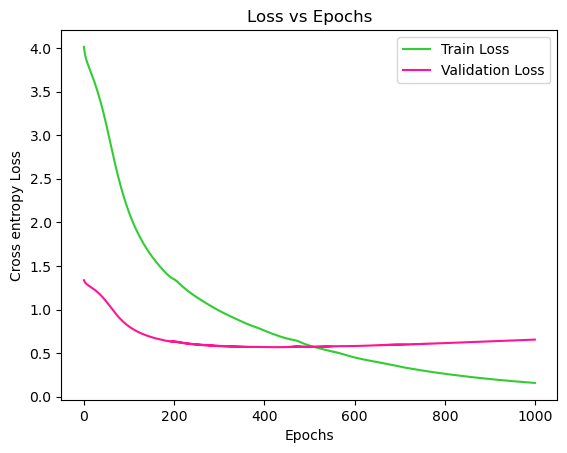

In [127]:
importlib.reload(md)

m0 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [100,80])


Reportar las siguientes métricas de performance, sobre los conjuntos de entrenamiento
y validación, para el modelo base entrenado:
- Accuracy
- Cross-Entropy
- Matriz de Confusión

Accuracy: 0.5870
Cross Entropy: 1.9668


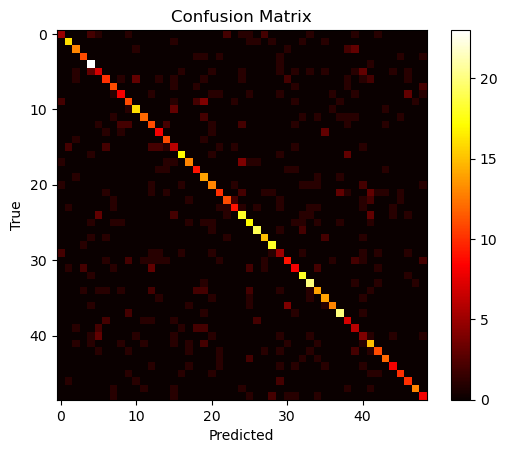

In [88]:
importlib.reload(mt)
y_pred_val = m0.forward_pass(X_val, False)
get_metrics = mt.get_metrics(y_pred_val, y_val)

### 3) Implementación y Entrenamiento de una Red Neuronal Avanzada

Implementar las siguientes mejoras al algoritmo de entrenamiento, y para cada una reportar el efecto observado sobre el tiempo de entrenamiento y la performance del modelo resultante.
- Rate scheduling lineal (con saturación) y exponencial.
- Mini-batch stochastic gradient descent.
- Optimizador ADAM.
- Regularización L2.
- Regularización mediante early stopping.
- OPCIONAL: Regularización mediante dropout.
- OPCIONAL: batch normalization.


In [89]:
funciones_de_activacion = ["ReLU", "ReLU", "softmax"]
nodos_por_capa = [100, 80]

Epoch 0, Loss: 3.9755400046716374
loss val: 1.3323479273524452
Epoch 10, Loss: 3.729194361858526
loss val: 1.2608416679359256
Epoch 20, Loss: 3.5482241024066594
loss val: 1.2105508975783468
Epoch 30, Loss: 3.3435493429284526
loss val: 1.1540564409475587
Epoch 40, Loss: 3.11630124382381
loss val: 1.0893914732371917
Epoch 50, Loss: 2.8834310863661807
loss val: 1.0207974697236784
Epoch 60, Loss: 2.663891328647746
loss val: 0.9558051508066092
Epoch 70, Loss: 2.470803444505647
loss val: 0.899724155227048
Epoch 80, Loss: 2.304983183125121
loss val: 0.8533613235195722
Epoch 90, Loss: 2.164054560527029
loss val: 0.8155654135100552
Epoch 100, Loss: 2.0441917986066294
loss val: 0.7848194849266538
Epoch 110, Loss: 1.9410425762306835
loss val: 0.7592392187927164
Epoch 120, Loss: 1.851081755610132
loss val: 0.7377736037103187
Epoch 130, Loss: 1.7716737907078657
loss val: 0.7196539245680674
Epoch 140, Loss: 1.7011119557781706
loss val: 0.7043337561712759
Epoch 150, Loss: 1.6377464497096594
loss val:

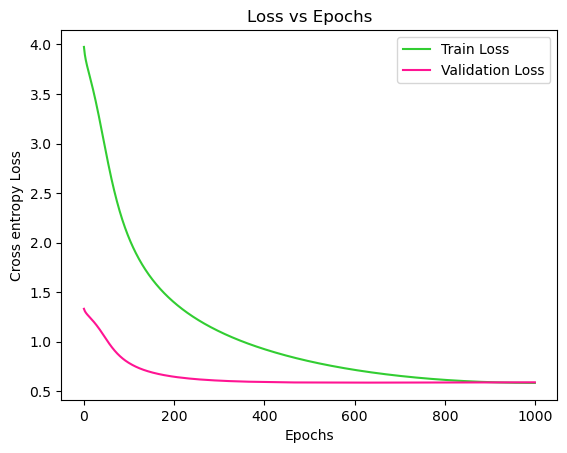

Accuracy: 0.5770
Cross Entropy: 1.7705


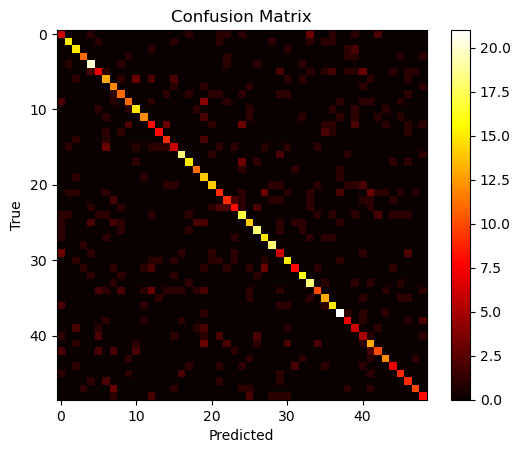

In [90]:
importlib.reload(md)
mejora = {}
mejora["Rate scheduling lineal"] = 0.001
rsl = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(rsl.forward_pass(X_val, False), y_val)


Epoch 0, Loss: 3.9839544733431405
loss val: 1.3268360501094587
Epoch 10, Loss: 3.798955978558131
loss val: 1.2786055362060307
Epoch 20, Loss: 3.6909942366332418
loss val: 1.2495150491091456
Epoch 30, Loss: 3.583858455514402
loss val: 1.2200706387187479
Epoch 40, Loss: 3.473082382967558
loss val: 1.190016831634791
Epoch 50, Loss: 3.3566982166639323
loss val: 1.1574511381589978
Epoch 60, Loss: 3.2394787784996963
loss val: 1.1241394797295272
Epoch 70, Loss: 3.1288445320184866
loss val: 1.0930357854026225
Epoch 80, Loss: 3.027465950287173
loss val: 1.0647086793784915
Epoch 90, Loss: 2.9364844547115014
loss val: 1.039386357653185
Epoch 100, Loss: 2.8555333269358347
loss val: 1.016608382923287
Epoch 110, Loss: 2.7833120943520195
loss val: 0.9962788510594245
Epoch 120, Loss: 2.7195135066039073
loss val: 0.9784583191165159
Epoch 130, Loss: 2.6630825150611774
loss val: 0.9628110589986614
Epoch 140, Loss: 2.6132707369000667
loss val: 0.9490020469963335
Epoch 150, Loss: 2.569332899676732
loss val

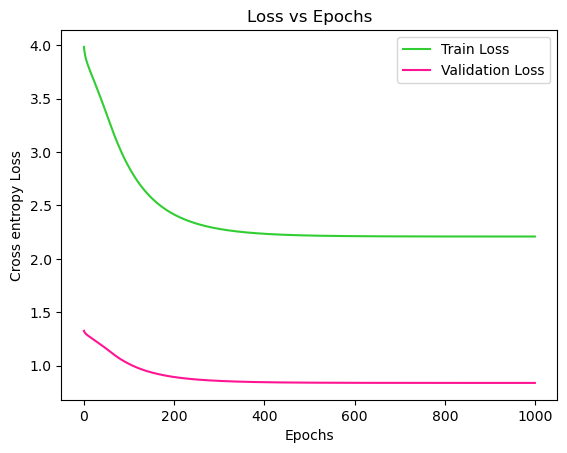

Accuracy: 0.3870
Cross Entropy: 2.5170


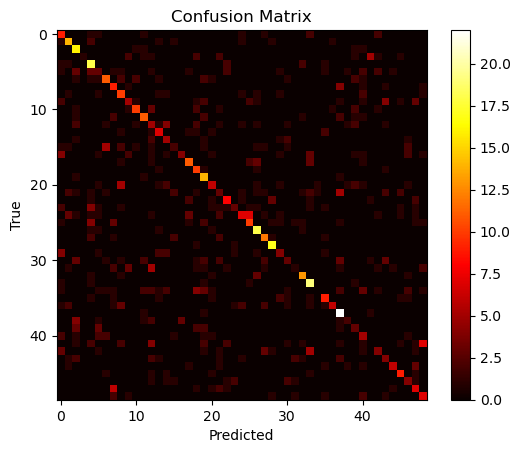

In [92]:
# Learning rate scheduling exponencial
importlib.reload(md)
mejora = {}
mejora["Rate scheduling exponencial"] = 0.99    # decay rate
rsl = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(rsl.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.2193539271334854
loss val: 1.1120027443118243
Epoch 10, Loss: 0.7366429512302183
loss val: 0.596678187301675
Epoch 20, Loss: 0.21937805458813106
loss val: 0.620979703033263
Epoch 30, Loss: 0.07331091724637964
loss val: 0.7099139825393465
Epoch 40, Loss: 0.030383488564820933
loss val: 0.7541737408817393
Epoch 50, Loss: 0.01881270717703487
loss val: 0.7919764167315251
Epoch 60, Loss: 0.013334229840185606
loss val: 0.8238544244318325
Epoch 70, Loss: 0.010143994860030835
loss val: 0.8439618788129857
Epoch 80, Loss: 0.008092706051283857
loss val: 0.8609528798399821
Epoch 90, Loss: 0.006712291090979755
loss val: 0.8781057557545605
Epoch 100, Loss: 0.005717269751886236
loss val: 0.8921278345462893
Epoch 110, Loss: 0.00494020070588484
loss val: 0.9017943855746489
Epoch 120, Loss: 0.004347906499556501
loss val: 0.911684644978456
Epoch 130, Loss: 0.0038741295290177728
loss val: 0.9217016683272735
Epoch 140, Loss: 0.003485696264009191
loss val: 0.9310086611942253
Epoch 150, Loss:

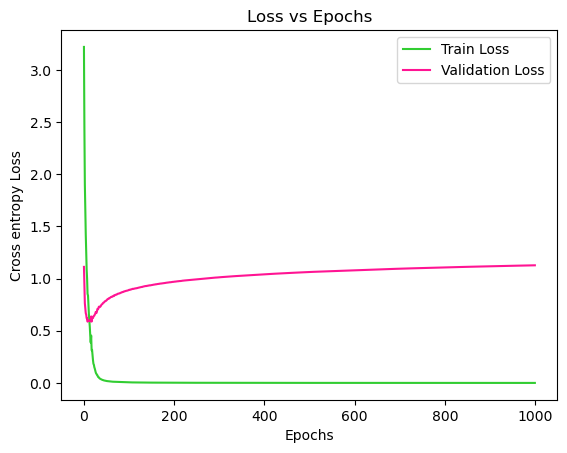

Accuracy: 0.5810
Cross Entropy: 3.6268


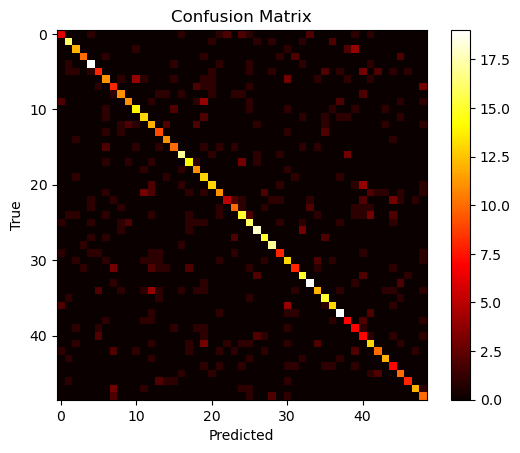

In [93]:
importlib.reload(md)
mejora = {}
mejora["Mini batch stochastic gradient descent"] = 64
minibatch_sgd = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(minibatch_sgd.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 2.9248981341133633
loss val: 1.0315154520373213
Epoch 10, Loss: 0.43106703777564137
loss val: 0.5706556981803738
Epoch 20, Loss: 0.09950550844748365
loss val: 0.642002917092559
Epoch 30, Loss: 0.02976439313494313
loss val: 0.7253893039854824
Epoch 40, Loss: 0.012805417243002602
loss val: 0.7882294988458635
Epoch 50, Loss: 0.006926731354544093
loss val: 0.8324406159480308
Epoch 60, Loss: 0.004175334146766218
loss val: 0.8707015544127178
Epoch 70, Loss: 0.002702246973231327
loss val: 0.9037931336435749
Epoch 80, Loss: 0.0018270703240276826
loss val: 0.9338119166227219
Epoch 90, Loss: 0.0012995547550247388
loss val: 0.962492617342163
Epoch 100, Loss: 0.0009055435434085271
loss val: 0.9856078774359118
Epoch 110, Loss: 0.0006540363527424303
loss val: 1.0083762023029579
Epoch 120, Loss: 0.0004777950103284357
loss val: 1.0285618802897452
Epoch 130, Loss: 0.0003532801822467054
loss val: 1.0483236486266825
Epoch 140, Loss: 0.0002610910782398764
loss val: 1.069011338801394
Epoch 1

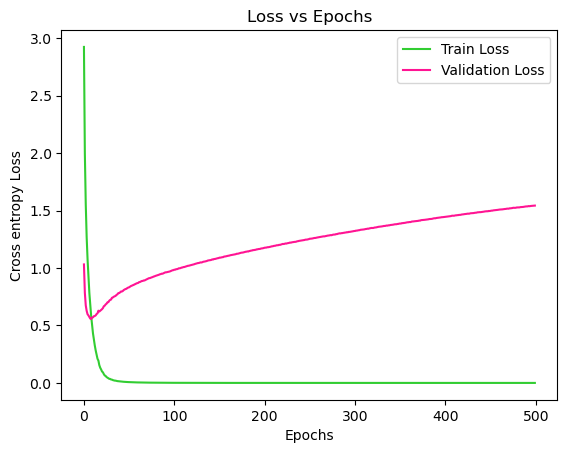

Accuracy: 0.5660
Cross Entropy: 5.8555


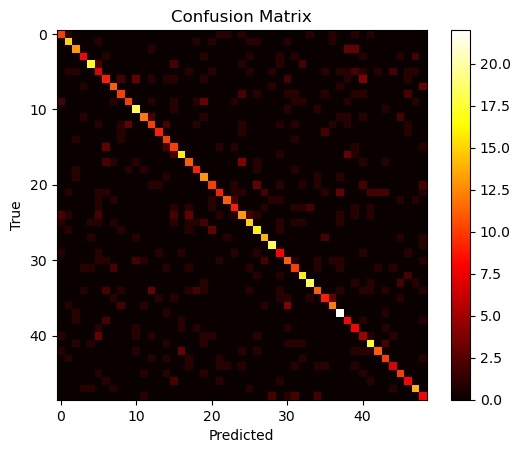

In [159]:
# ADAM
importlib.reload(md)
mejora = {}
mejora["ADAM"] = [0.9, 0.999, 1e-8]
mejora["Mini batch stochastic gradient descent"] = 64
adam = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora, 0.001, 500)
get_metrics = mt.get_metrics(adam.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9531330741854735
loss val: 1.3261645785671208
Epoch 10, Loss: 3.7977470815295202
loss val: 1.281233714551864
Epoch 20, Loss: 3.673840094200766
loss val: 1.2479531938778037
Epoch 30, Loss: 3.5202545610358165
loss val: 1.206736153313315
Epoch 40, Loss: 3.3323642194625114
loss val: 1.1559680264201677
Epoch 50, Loss: 3.11140872231357
loss val: 1.0935266192313937
Epoch 60, Loss: 2.8715998256774107
loss val: 1.0246387397222667
Epoch 70, Loss: 2.63561169697429
loss val: 0.9569268811671913
Epoch 80, Loss: 2.4250610978515748
loss val: 0.8970859422797077
Epoch 90, Loss: 2.246480312113346
loss val: 0.8475561634340715
Epoch 100, Loss: 2.0972863461408995
loss val: 0.8072421535140816
Epoch 110, Loss: 1.9713198201156008
loss val: 0.7741459410147586
Epoch 120, Loss: 1.8631295904029175
loss val: 0.7466995106145222
Epoch 130, Loss: 1.7688819822651074
loss val: 0.7236611012292813
Epoch 140, Loss: 1.6860541734816592
loss val: 0.7042879760173205
Epoch 150, Loss: 1.6126492499422609
loss val

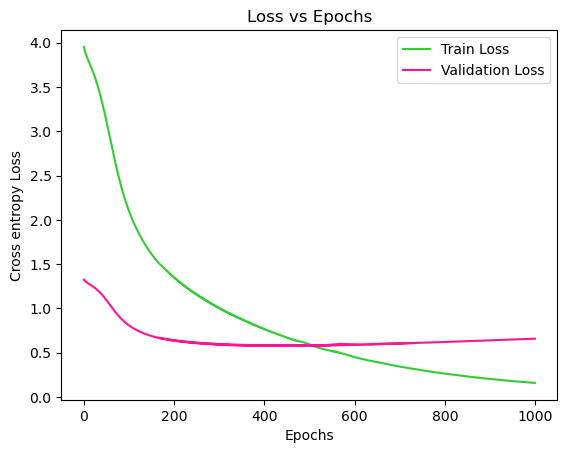

Accuracy: 0.5770
Cross Entropy: 1.9741


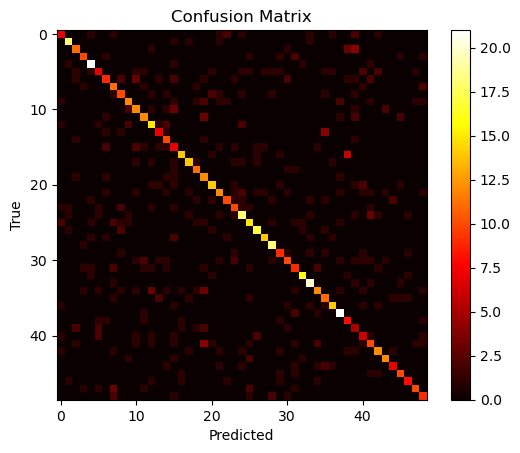

In [95]:
# regularización L2
importlib.reload(md)
mejora = {}
mejora["L2"] = 0.01
l2 = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(l2.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.95739336936552
loss val: 1.3184793153590062
Epoch 10, Loss: 3.7878936670247163
loss val: 1.2709286383304819
Epoch 20, Loss: 3.6435949692567764
loss val: 1.2320016314712148
Epoch 30, Loss: 3.4666579824815673
loss val: 1.1834305930575675
Epoch 40, Loss: 3.253140277204527
loss val: 1.1232635392639014
Epoch 50, Loss: 3.0055961879720914
loss val: 1.054173405093221
Epoch 60, Loss: 2.7556896463651066
loss val: 0.9841114712082186
Epoch 70, Loss: 2.5306207201651247
loss val: 0.9220186852696236
Epoch 80, Loss: 2.338464892358206
loss val: 0.869650693351404
Epoch 90, Loss: 2.1766930437667686
loss val: 0.8267343557142849
Epoch 100, Loss: 2.04037265049477
loss val: 0.7911937562757292
Epoch 110, Loss: 1.923597273189647
loss val: 0.7618805414307778
Epoch 120, Loss: 1.8222485023015949
loss val: 0.7375011419265446
Epoch 130, Loss: 1.7329684378185746
loss val: 0.7167658798792774
Epoch 140, Loss: 1.6533406073445498
loss val: 0.6990405935248535
Epoch 150, Loss: 1.5821385250917939
loss val:

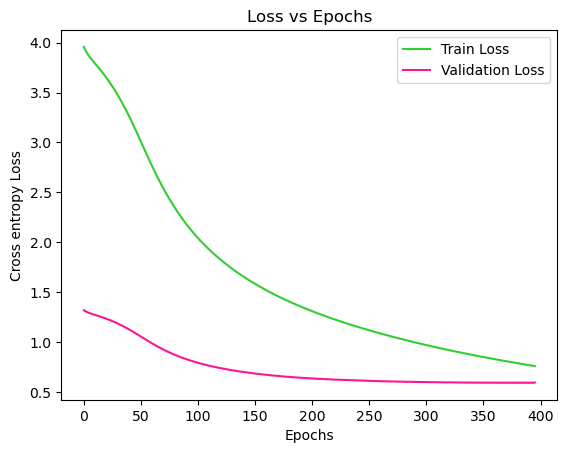

Accuracy: 0.5480
Cross Entropy: 1.7823


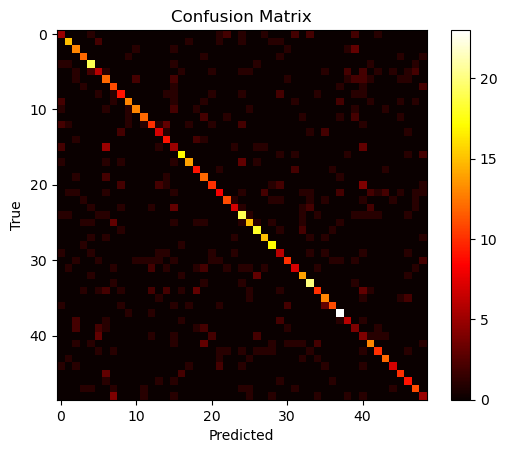

In [96]:
# Early stopping
importlib.reload(md)
mejora = {}
mejora["Early stopping"] = 5
early_stopping = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)

get_metrics = mt.get_metrics(early_stopping.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9399456270090303
loss val: 1.3148032826274385
Epoch 10, Loss: 3.8277772649938786
loss val: 1.2812419639600114
Epoch 20, Loss: 3.7992774267127247
loss val: 1.273650020798214
Epoch 30, Loss: 3.770025943850666
loss val: 1.2656308914884635
Epoch 40, Loss: 3.7382807641403724
loss val: 1.2570319872399973
Epoch 50, Loss: 3.703818957016131
loss val: 1.2480556485351941
Epoch 60, Loss: 3.663579387357311
loss val: 1.2371005830282529
Epoch 70, Loss: 3.617700284234569
loss val: 1.2247937276451522
Epoch 80, Loss: 3.566746297428062
loss val: 1.2113996186219411
Epoch 90, Loss: 3.5133381931142122
loss val: 1.1971016239134065
Epoch 100, Loss: 3.461783234720316
loss val: 1.1832125388207735
Epoch 110, Loss: 3.4064112597503797
loss val: 1.1687179723901977
Epoch 120, Loss: 3.3512520494086213
loss val: 1.1544002318675552
Epoch 130, Loss: 3.294235214517058
loss val: 1.139427756886737
Epoch 140, Loss: 3.241210915362097
loss val: 1.1260186656114137
Epoch 150, Loss: 3.18569276131534
loss val: 1.

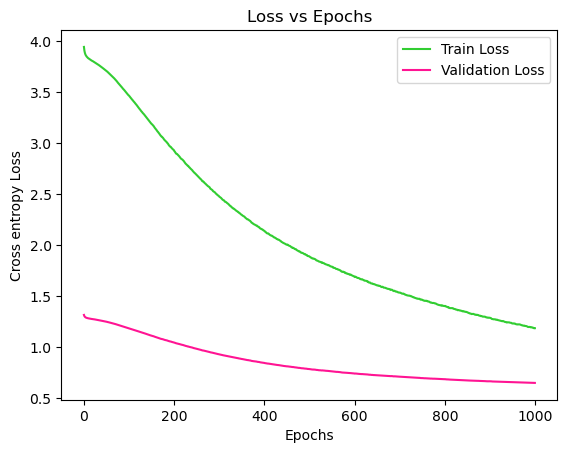

Accuracy: 0.5150
Cross Entropy: 1.9471


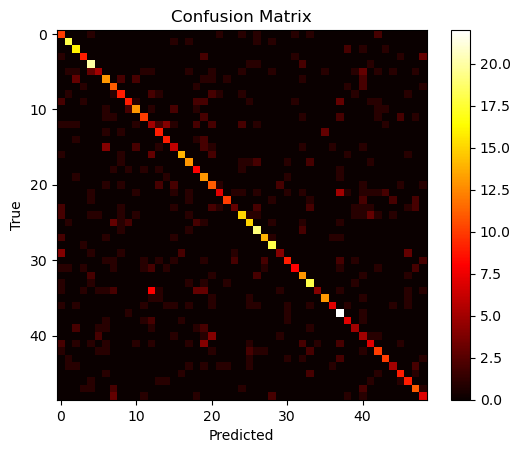

In [97]:
# dropout
importlib.reload(md)
mejora = {}
mejora["Dropout"] = 0.5
dropout = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(dropout.forward_pass(X_val, False), y_val)

# Modelo m1 búsqueda
Explorar cambios en la arquitectura de la red (es decir, la cantidad de capas ocultas y unidades ocultas por capa), y los hiperparámetros (cada uno de los items en la lista anterior tiene una serie de parámetros que podemos variar), y determinar la configuración que funcione mejor (menor error de validación). Llamaremos a este modelo M1

In [99]:
mejoras = {}
mejoras["Early stopping"] = 5

Probamos siempre con early stopping para acortar el tiempo de entrenamiento evitando, además, el overfitting.

Epoch 0, Loss: 3.999900136674128
loss val: 1.3293241161861575
Epoch 10, Loss: 3.7706853023206106
loss val: 1.2628033985917224
Epoch 20, Loss: 3.620918266293376
loss val: 1.2216250375136675
Epoch 30, Loss: 3.4531023814700257
loss val: 1.1743312862040078
Epoch 40, Loss: 3.272707796715622
loss val: 1.1233699543284763
Epoch 50, Loss: 3.0890224744255104
loss val: 1.0712614419488364
Epoch 60, Loss: 2.9098733439830147
loss val: 1.0205975870211117
Epoch 70, Loss: 2.74332624407869
loss val: 0.9742289422750171
Epoch 80, Loss: 2.5925349898360808
loss val: 0.9320374053017325
Epoch 90, Loss: 2.458164177894707
loss val: 0.8946707528374256
Epoch 100, Loss: 2.3398066676643676
loss val: 0.862057449939995
Epoch 110, Loss: 2.235733380482718
loss val: 0.833618515215643
Epoch 120, Loss: 2.1437151860304993
loss val: 0.8090045080473238
Epoch 130, Loss: 2.0620161264284835
loss val: 0.7875827720147057
Epoch 140, Loss: 1.9888452167905641
loss val: 0.7688392416853583
Epoch 150, Loss: 1.9228932541955812
loss val:

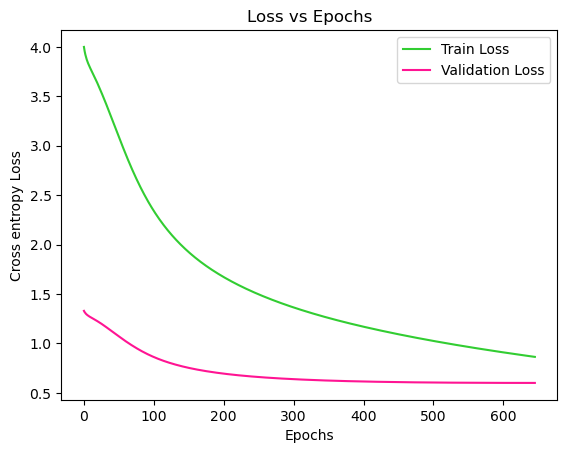

-------------------- 1 capa de 64 nodos --------------------
Accuracy: 0.5480
Cross Entropy: 1.8009


In [100]:
# una capa de 64 nodos
importlib.reload(md)
importlib.reload(mt)
m0 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "softmax"], [64], mejoras)
print("-"*20, "1 capa de 64 nodos", "-"*20)
mt.print_acc_ce(m0.forward_pass(X_val, False), y_val,)

Ya tenemos un modelo básico, ahora vamos a ver que pasa si le agregamos una capa.

Epoch 0, Loss: 3.97482464422752
loss val: 1.332423712129681
Epoch 10, Loss: 3.8321482651175276
loss val: 1.292556882478196
Epoch 20, Loss: 3.7383922714277062
loss val: 1.2726013456879046
Epoch 30, Loss: 3.647298184864111
loss val: 1.2518017103393306
Epoch 40, Loss: 3.5515981113571087
loss val: 1.2288063203815285
Epoch 50, Loss: 3.450830917713675
loss val: 1.2042182140306938
Epoch 60, Loss: 3.3471724740112676
loss val: 1.178131579225587
Epoch 70, Loss: 3.239595535808972
loss val: 1.1501372750577457
Epoch 80, Loss: 3.128051961249551
loss val: 1.1203081677681717
Epoch 90, Loss: 3.0105676165985145
loss val: 1.0886503940110213
Epoch 100, Loss: 2.8885417459183587
loss val: 1.0549901168801823
Epoch 110, Loss: 2.7636885319973934
loss val: 1.0196680670910483
Epoch 120, Loss: 2.639762878714109
loss val: 0.9841357154800113
Epoch 130, Loss: 2.5210739557573034
loss val: 0.9496786492689342
Epoch 140, Loss: 2.410519290197589
loss val: 0.9180006435076707
Epoch 150, Loss: 2.309949730201116
loss val: 0.

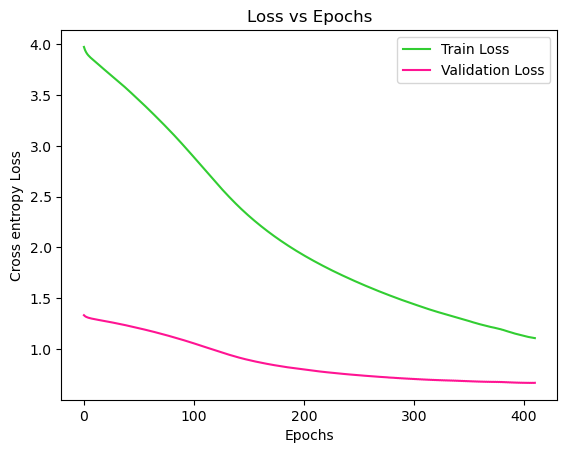

-------------------- 2 capas de 64 y 32 nodos --------------------
Accuracy: 0.5090
Cross Entropy: 1.9998


In [101]:
# 2 capas de 64 y 32 nodos
importlib.reload(md)
importlib.reload(mt)
m1 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [64, 32], mejoras)
print("-"*20, "2 capas de 64 y 32 nodos", "-"*20)
mt.print_acc_ce(m1.forward_pass(X_val, False), y_val,)

Vimos que no mejoró. Probamos mantener la cantidad de capas y aumentar la cantidad de neuronas por capa.

Epoch 0, Loss: 4.027895569588543
loss val: 1.3458511045094934
Epoch 10, Loss: 3.776388519207843
loss val: 1.2732077591281878
Epoch 20, Loss: 3.6118891660282704
loss val: 1.227334443312581
Epoch 30, Loss: 3.4131486722241657
loss val: 1.1714538771265837
Epoch 40, Loss: 3.178671324285927
loss val: 1.1052630105308898
Epoch 50, Loss: 2.9248008807351153
loss val: 1.0323615847115577
Epoch 60, Loss: 2.67856193768485
loss val: 0.9598029693087753
Epoch 70, Loss: 2.459250614264194
loss val: 0.8952880908544929
Epoch 80, Loss: 2.2732264811911236
loss val: 0.8422665001250302
Epoch 90, Loss: 2.1169411808356715
loss val: 0.7990478663308256
Epoch 100, Loss: 1.9851575401831887
loss val: 0.7637066753306838
Epoch 110, Loss: 1.8728471805515141
loss val: 0.7348603393275825
Epoch 120, Loss: 1.7750492842866457
loss val: 0.7108595665025459
Epoch 130, Loss: 1.689315808887943
loss val: 0.6908432581335529
Epoch 140, Loss: 1.6131117352693467
loss val: 0.6741494739072968
Epoch 150, Loss: 1.5449644720226785
loss val

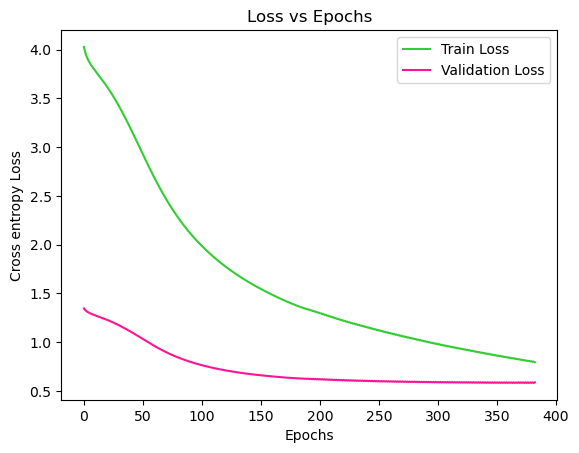

-------------------- 2 capas de 80 y 100 nodos --------------------
Accuracy: 0.5550
Cross Entropy: 1.7640


In [ ]:
# [80, 100]
importlib.reload(md)
importlib.reload(mt)
mod = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [80, 100], mejoras)
print("-"*20, "2 capas de 80 y 100 nodos", "-"*20)
mt.print_acc_ce(mod.forward_pass(X_val, False), y_val,)

Como una sola capa era mejor que dos con pocas neuronas pero sube cuando son dos con más neuronas, probamos una sola capa con 200 neuronas.

Epoch 0, Loss: 4.033257152312371
loss val: 1.3494082176378706
Epoch 10, Loss: 3.7498464780833767
loss val: 1.2652299643614227
Epoch 20, Loss: 3.5419091405171863
loss val: 1.2041579602121215
Epoch 30, Loss: 3.33569432685803
loss val: 1.1442602434407507
Epoch 40, Loss: 3.1293543442416913
loss val: 1.0843804298411195
Epoch 50, Loss: 2.9283150182129383
loss val: 1.0258265803937603
Epoch 60, Loss: 2.7386303951003725
loss val: 0.9710214676309159
Epoch 70, Loss: 2.56656216579361
loss val: 0.9218560444130384
Epoch 80, Loss: 2.4138002577279942
loss val: 0.8786872026352691
Epoch 90, Loss: 2.2794354195096935
loss val: 0.8410516495040098
Epoch 100, Loss: 2.162071620070924
loss val: 0.8086861175097991
Epoch 110, Loss: 2.0592807603196945
loss val: 0.780771489625692
Epoch 120, Loss: 1.9691241888032813
loss val: 0.7566623669140161
Epoch 130, Loss: 1.889663700496944
loss val: 0.7358329267552002
Epoch 140, Loss: 1.8190989249437146
loss val: 0.7178432316791888
Epoch 150, Loss: 1.7559235253292287
loss val

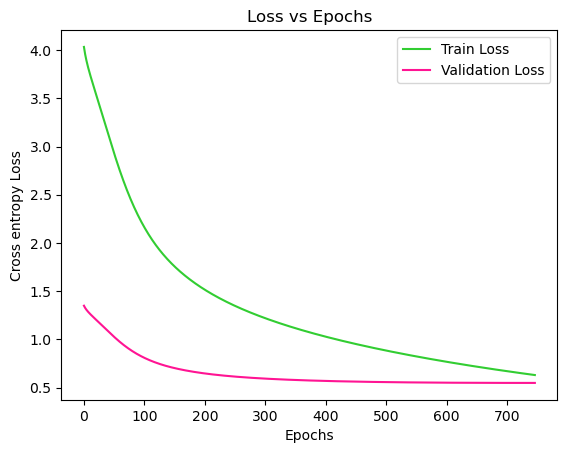

-------------------- 1 capa de 200 nodos --------------------
Accuracy: 0.5750
Cross Entropy: 1.6459


In [103]:
# una capa 200 neuronas
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "softmax"], [200], mejoras)
print("-"*20, "1 capa de 200 nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Probamos muchas capas ocultas y muchas neuronas, la idea de "just add more layers".

Epoch 0, Loss: 3.9485833956564105
loss val: 1.3121043809015898
Epoch 10, Loss: 3.6691971628611793
loss val: 1.2422562643574016
Epoch 20, Loss: 3.3158367601389354
loss val: 1.1435513642520931
Epoch 30, Loss: 2.7764413458808472
loss val: 0.9879022861272287
Epoch 40, Loss: 2.85643348032823
loss val: 1.0130686301535181
Epoch 50, Loss: 2.208952543527554
loss val: 0.8469079328836113
Epoch 60, Loss: 1.9109365605157569
loss val: 0.763104640253987
Epoch 70, Loss: 1.7829826866373144
loss val: 0.7487816207659241
Epoch 80, Loss: 1.594556154605104
loss val: 0.7047403860184067
Epoch 90, Loss: 1.5298159774405424
loss val: 0.7062388751502107
Epoch 100, Loss: 1.3460149962831687
loss val: 0.6658945378114687
Epoch 110, Loss: 1.3437841074215673
loss val: 0.6667495806351504
Epoch 120, Loss: 1.1683301838602937
loss val: 0.6439740662976803
Epoch 130, Loss: 1.0998073659170908
loss val: 0.607477676328472
Epoch 140, Loss: 0.9124624809232871
loss val: 0.5659014930244046
Epoch 150, Loss: 0.9212881374383486
loss v

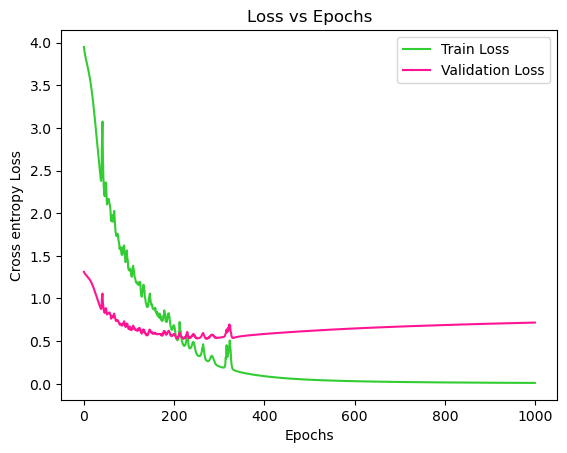

-------------------- 4 capas de [200, 250, 300, 500] nodos --------------------
Accuracy: 0.6180
Cross Entropy: 2.1727


In [104]:
# [200, 250, 300, 500]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "ReLU", "ReLU", "softmax"], [200, 250, 300, 500])
print("-"*20, "4 capas de [200, 250, 300, 500] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Tuvo una mejor accuracy que en los otros pero tardó mucho tiempo asi que probamos con 3 capas ocultas

Epoch 0, Loss: 4.031811155760588
loss val: 1.3553755584819527
Epoch 10, Loss: 3.838016514790675
loss val: 1.2985537688552506
Epoch 20, Loss: 3.7337969039492105
loss val: 1.2710829488366604
Epoch 30, Loss: 3.627363352945819
loss val: 1.2430200240115845
Epoch 40, Loss: 3.4975144483017346
loss val: 1.208451244169743
Epoch 50, Loss: 3.3371757502828574
loss val: 1.1644560275140836
Epoch 60, Loss: 3.147148043764966
loss val: 1.1107510301664238
Epoch 70, Loss: 2.9397373625637537
loss val: 1.0509779723788901
Epoch 80, Loss: 2.730791611570922
loss val: 0.9896598867997779
Epoch 90, Loss: 2.534919726231761
loss val: 0.9320375810702389
Epoch 100, Loss: 2.3609864737926247
loss val: 0.8808811121430649
Epoch 110, Loss: 2.2089644350704862
loss val: 0.836921102768669
Epoch 120, Loss: 2.0774895929590236
loss val: 0.7999922548451616
Epoch 130, Loss: 1.9637351262899227
loss val: 0.7689663931767694
Epoch 140, Loss: 1.8649106375465387
loss val: 0.74293456233299
Epoch 150, Loss: 1.777876392322436
loss val: 0

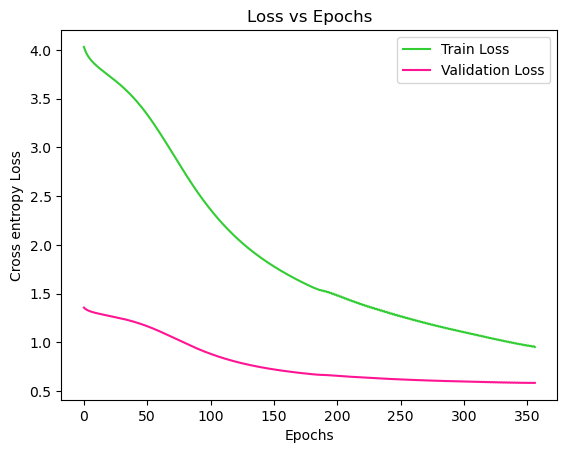

-------------------- 4 capas de [100, 200, 200] nodos --------------------
Accuracy: 0.5630
Cross Entropy: 1.7501


In [105]:
# [100, 200, 200]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "ReLU", "softmax"], [100, 200, 200], mejoras, 0.05)
print("-"*20, "4 capas de [100, 200, 200] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Se nota un patrón de que al modelo le va bien cuando tiene muchos nodos en la última capa. Probamos.

Epoch 0, Loss: 3.96097101096936
loss val: 1.328083620777456
Epoch 10, Loss: 3.773687788998796
loss val: 1.2784391713017542
Epoch 20, Loss: 3.5962537162328294
loss val: 1.2308290151767873
Epoch 30, Loss: 3.3434593955007
loss val: 1.1590463338346453
Epoch 40, Loss: 3.050518519232327
loss val: 1.07463268117856
Epoch 50, Loss: 2.757361022819613
loss val: 0.9898139224335344
Epoch 60, Loss: 2.4935426855171126
loss val: 0.9134565284258317
Epoch 70, Loss: 2.271437225301938
loss val: 0.8495718580261478
Epoch 80, Loss: 2.091958638833365
loss val: 0.7984629372167469
Epoch 90, Loss: 1.94579878847453
loss val: 0.7581388892408726
Epoch 100, Loss: 1.8253184659403852
loss val: 0.7262375779149151
Epoch 110, Loss: 1.723344349938739
loss val: 0.7007054954107137
Epoch 120, Loss: 1.6457704653857395
loss val: 0.6855675877997336
Epoch 130, Loss: 1.5778529836144826
loss val: 0.6708138796435796
Epoch 140, Loss: 1.516129427968669
loss val: 0.6587098029117983
Epoch 150, Loss: 1.451720569265405
loss val: 0.644008

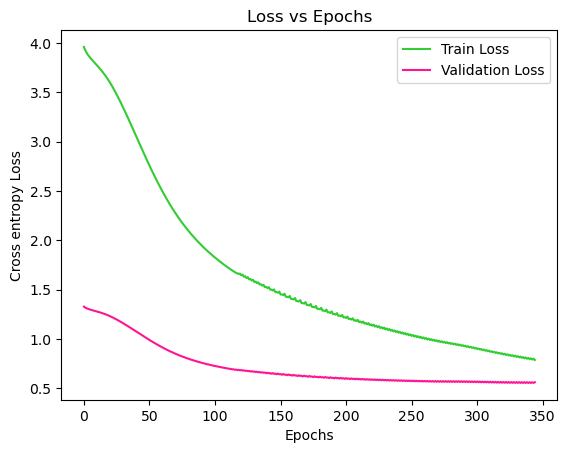

-------------------- 4 capas de [60, 300] nodos --------------------
Accuracy: 0.5710
Cross Entropy: 1.6844


In [106]:
# [60, 300]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [60, 300], mejoras)
print("-"*20, "4 capas de [60, 300] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Expandimos sobre esta idea

Epoch 0, Loss: 3.916433171276827
loss val: 1.3148263383980674
Epoch 10, Loss: 3.626722978687549
loss val: 1.2365064804716108
Epoch 20, Loss: 3.2612701376350275
loss val: 1.130885135285496
Epoch 30, Loss: 2.8216449202690157
loss val: 0.9984512206718594
Epoch 40, Loss: 2.4365171327717463
loss val: 0.8837220917224786
Epoch 50, Loss: 2.1443719153149243
loss val: 0.7997242195565925
Epoch 60, Loss: 1.9296090649458724
loss val: 0.7402926472866814
Epoch 70, Loss: 1.7969875914427291
loss val: 0.7102080898481612
Epoch 80, Loss: 1.7645638446789078
loss val: 0.7000504083337076
Epoch 90, Loss: 1.6342187758441853
loss val: 0.6700990236719719
Epoch 100, Loss: 1.502293079098266
loss val: 0.6460852511754959
Epoch 110, Loss: 1.4485653888500065
loss val: 0.6334801629538402
Epoch 120, Loss: 1.376046155667951
loss val: 0.6205823437216476
Epoch 130, Loss: 1.3028032132102723
loss val: 0.6082003424781688
Epoch 140, Loss: 1.253504650500262
loss val: 0.599925531868976
Epoch 150, Loss: 1.1793699526187118
loss va

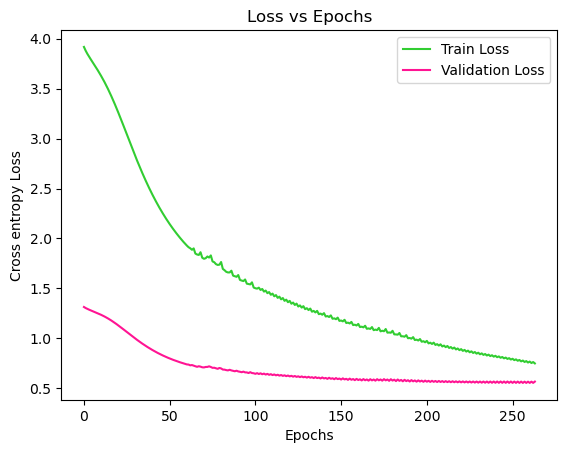

-------------------- 4 capas de [60, 800] nodos --------------------
Accuracy: 0.5900
Cross Entropy: 1.7052


In [107]:
# [60, 800]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [60, 800], mejoras)
print("-"*20, "4 capas de [60, 800] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Para optimizar tiempo bajamos un poco.

Epoch 0, Loss: 3.934780440217584
loss val: 1.3164007726229547
Epoch 10, Loss: 3.634074146823883
loss val: 1.2397071482875464
Epoch 20, Loss: 3.283539353148169
loss val: 1.1486750876666654
Epoch 30, Loss: 2.8819445144440414
loss val: 1.0344555507964628
Epoch 40, Loss: 2.5172600715701487
loss val: 0.9290599142880256
Epoch 50, Loss: 2.2267820971438796
loss val: 0.8453976752915945
Epoch 60, Loss: 2.0042505173032437
loss val: 0.7832549233667891
Epoch 70, Loss: 1.8331769896918721
loss val: 0.7379256172078233
Epoch 80, Loss: 1.6984854510659846
loss val: 0.7051420636684959
Epoch 90, Loss: 1.6182242579569237
loss val: 0.6923397221803453
Epoch 100, Loss: 1.552428508325225
loss val: 0.6795471739458039
Epoch 110, Loss: 1.4699283306211934
loss val: 0.6654576688689436
Epoch 120, Loss: 1.388265919997278
loss val: 0.6493967618430944
Epoch 130, Loss: 1.325617698497728
loss val: 0.6413474801585995
Epoch 140, Loss: 1.2632513432953045
loss val: 0.6315928889092536
Epoch 150, Loss: 1.2114722806983789
loss v

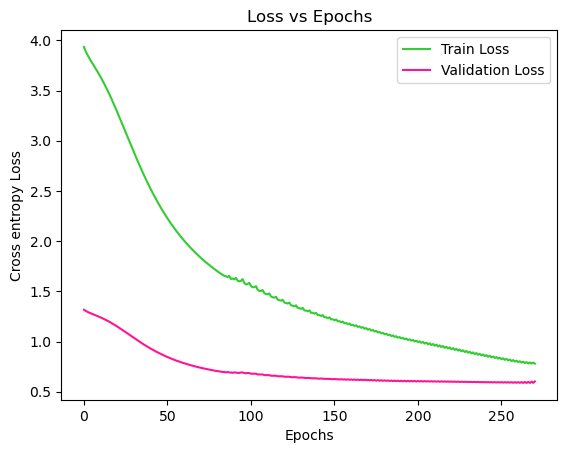

-------------------- 4 capas de [60, 500] nodos --------------------
Accuracy: 0.5420
Cross Entropy: 1.8065


In [108]:
# [60, 500]
importlib.reload(md)
importlib.reload(mt)
m3 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [60, 500], mejoras)
print("-"*20, "4 capas de [60, 500] nodos", "-"*20)
mt.print_acc_ce(m3.forward_pass(X_val, False), y_val,)

Teniendo en cuenta tiempo y performance para el modelo final vamos a usar la red con la arquitectura más compleja que era la de 4 capas con muchos nodos pero, con el fin de optimizar el tiempo, para la elegir los hiperparámetros, vamos a usar una red de una sola capa con 100 nodos para evaluar los hiperparámetros.

Learning Rate: 0.001
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Learning Rate: 0.01
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Learning Rate: 0.1
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Learning Rate: 1.0
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


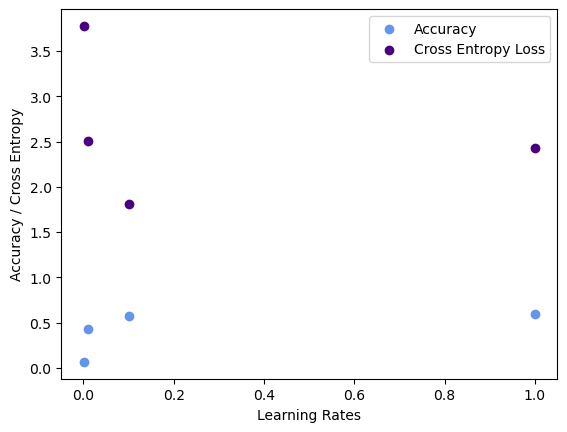

La menor pérdida fue:  1.8147531903371088 correspondiente al learning rate:  0.1


In [ ]:
importlib.reload(md)
importlib.reload(aux)
learning_rates = [0.001, 0.01, 0.1, 1.0]
params = [["ReLU", "softmax"], [100], None]

losses_cross_val = aux.cross_validation_lr(X_train, y_train, learning_rates, params)
acc_lr = [x[0] for x in losses_cross_val]
ce_lr = [x[1] for x in losses_cross_val]
best_lr = learning_rates[ce_lr.index(min(ce_lr))]

aux.graph(learning_rates, acc_lr, ce_lr, "Learning rate vs Accuracy and Cross Entropy Loss", "Learning Rates", ["Accuracy", "Cross Entropy Loss"])

print("La menor pérdida fue: ", min(ce_lr), "correspondiente al learning rate: ", best_lr)

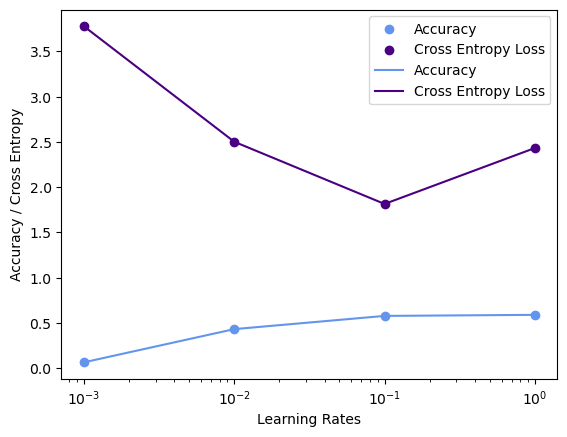

In [217]:
importlib.reload(aux)
aux.graph(learning_rates, acc_lr, ce_lr, "Learning rate vs Accuracy and Cross Entropy Loss", "Learning Rates", ["Accuracy", "Cross Entropy Loss"], scale='log', unite=True)

### Mejoras independientes
Probamos los mejores parámetros para cada mejoras asumiendo que se usa esa sola con Early stopping.
##### Learning Rate Scheduling
Lineal

hp: 0
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5666666666666667       avg ce =  1.775848768500373
hp: 1e-05
Avg results: 
                      avg acc =  0.572       avg ce =  1.7642151591644673
hp: 0.0001
Avg results: 
                      avg acc =  0.5663333333333334       avg ce =  1.7853289083040487
hp: 0.001
Avg results: 
                      avg acc =  0.5710000000000001       avg ce =  1.7553936683235527
hp: 0.01
Avg results: 
                      avg acc =  0.562       avg ce =  1.7901022741192592
hp: 0.1
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5696666666666668       avg ce =  1.7659785190429211


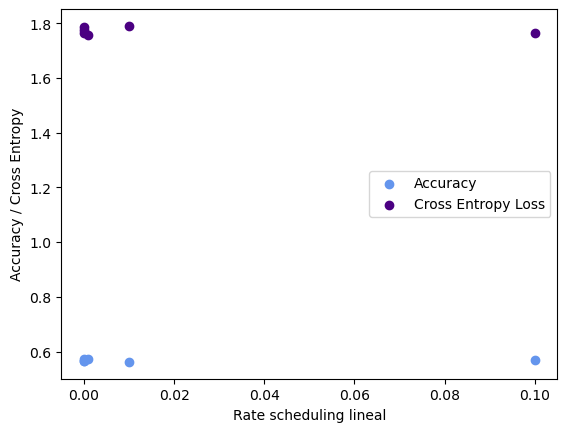

La menor pérdida fue:  1.7553936683235527 correspondiente al lr:  0.001


In [ ]:
importlib.reload(md)
importlib.reload(aux)

stop_crit = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
params = [["ReLU", "softmax"], [100], best_lr]

name = ("Rate scheduling lineal")
losses_rsl = aux.cross_validation_mejora(X_train, y_train, name, stop_crit, params)
acc = [x[0] for x in losses_rsl]
ce = [x[1] for x in losses_rsl]
best_stop_crit = stop_crit[ce.index(min(ce))]

aux.graph(stop_crit, acc, ce, "Rate scheduling lineal vs Accuracy and Cross Entropy Loss", "Rate scheduling lineal", ["Accuracy", "Cross Entropy Loss"], scale = 'log')

print("La menor pérdida fue: ", min(ce), "correspondiente al hp: ", best_stop_crit)

Exponencial

hp: 0.3
Avg results: 
                      avg acc =  0.016       avg ce =  3.969855943756457
hp: 0.5
Avg results: 
                      avg acc =  0.02733333333333333       avg ce =  3.958116974325516
hp: 0.9
Avg results: 
                      avg acc =  0.047       avg ce =  3.793497999611082
hp: 0.99
Avg results: 
                      avg acc =  0.4336666666666667       avg ce =  2.491361609761214
hp: 0.9999
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5716666666666667       avg ce =  1.740533619556997
hp: 1
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5773333333333334       avg ce =  1.7538277313032886


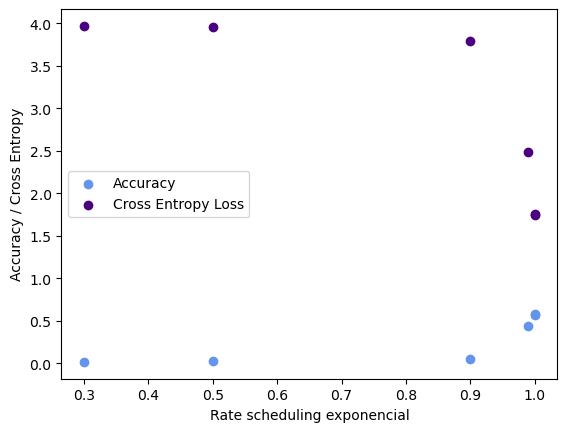

La menor pérdida fue:  1.740533619556997 correspondiente al decay rate:  0.9999


In [214]:
importlib.reload(md)
importlib.reload(aux)

decay_rates = [0.3, 0.5, 0.9, 0.99, 0.9999, 1]
params = [["ReLU", "softmax"], [100], best_lr]

name = ("Rate scheduling exponencial")
losses_rse = aux.cross_validation_mejora(X_train, y_train, name, decay_rates, params)
acc = [x[0] for x in losses_rse]
ce = [x[1] for x in losses_rse]
best_dr = decay_rates[ce.index(min(ce))]

aux.graph(decay_rates, acc, ce, "Rate scheduling exponencial vs Accuracy and Cross Entropy Loss", "Rate scheduling exponencial", ["Accuracy", "Cross Entropy Loss"])

print("La menor pérdida fue: ", min(ce), "correspondiente al decay rate: ", best_dr)

In [220]:
best_dr = best_dr


### Mini batch stochastic gradient descent
hiperparámetro: batch size

**batch size**
- muy chico --> va a oscliar más y puede diverger
- muy grande --> el lo mismo que no usar sgd

hp: 1
Avg results: 
                      avg acc =  0.29700000000000004       avg ce =  3.7094350206950075
hp: 32
Avg results: 
                      avg acc =  0.5856666666666668       avg ce =  3.1929781534078714
hp: 64
Avg results: 
                      avg acc =  0.5763333333333333       avg ce =  3.1029827115560105
hp: 128
Avg results: 
                      avg acc =  0.5623333333333334       avg ce =  2.875428962223709
hp: 256
Avg results: 
                      avg acc =  0.5693333333333334       avg ce =  2.6940322837533137
hp: 512
Avg results: 
                      avg acc =  0.5716666666666667       avg ce =  2.4532377459015873
hp: 1024
Avg results: 
                      avg acc =  0.5673333333333334       avg ce =  2.2519997427553333


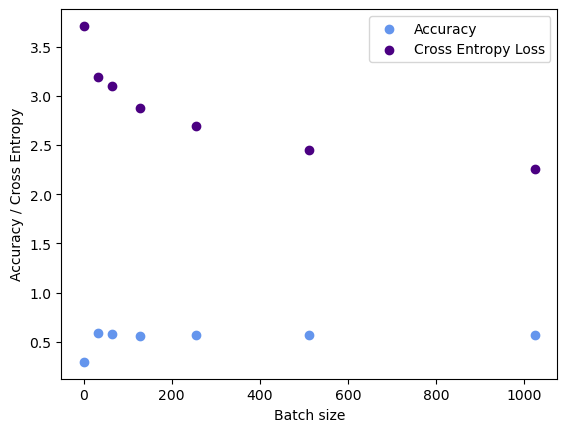

La menor pérdida fue:  2.2519997427553333 correspondiente al batch size:  1024


In [ ]:
importlib.reload(md)
importlib.reload(aux)

batch_sizes = [1, 32, 64, 128, 256, 512, 1024]
params = [["ReLU", "softmax"], [100], best_lr]
name = "Mini batch stochastic gradient descent"
losses_sgd = aux.cross_validation_mejora(X_train, y_train, name, batch_sizes, params)
acc = [x[0] for x in losses_sgd]
ce = [x[1] for x in losses_sgd]
best_batch_size = batch_sizes[ce.index(min(ce))]

aux.graph(batch_sizes, acc, ce, "Batch size vs Accuracy and Cross Entropy Loss", "Batch size", ["Accuracy", "Cross Entropy Loss"])

print("La menor pérdida fue: ", min(ce), "correspondiente al batch size: ", best_batch_size)

### ADAM
hiperparámetros: beta1, beta2, epsilon
- **beta1** --> momentum (cuanta memoria tiene mi modelo)
- **beta2** --> decay rate (bajo puede generar ruido)
- **epsilon** --> busca estabilidad numérica

hp: [0.9, 0.999, 1e-08]
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.27266666666666667       avg ce =  3.5393988990811396
hp: [0.5, 0.8, 1e-08]
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.33899999999999997       avg ce =  3.7597909410754786
hp: [0.99, 0.99999, 1e-08]
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.2013333333333333       avg ce =  3.5754620657543263
Accuracies:  [0.27266666666666667, 0.33899999999999997, 0.2013333333333333]
CE:  [3.5393988990811396, 3.7597909410754786, 3.5754620657543263]


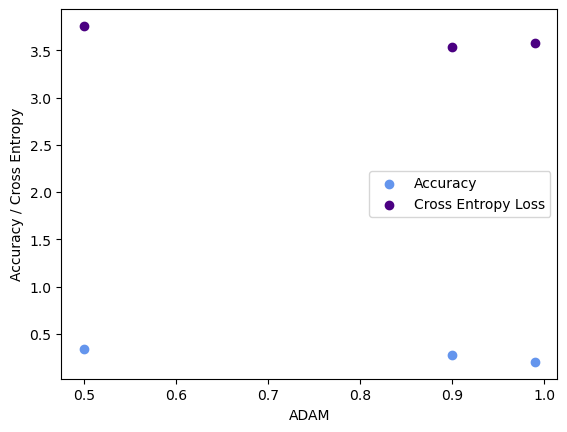

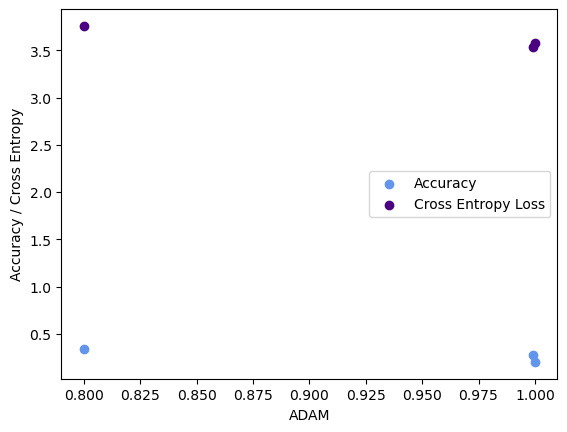

La menor pérdida fue:  3.5393988990811396 correspondiente a los hiperparámetros:  1024


In [ ]:
# ADAM con un solo batch
importlib.reload(md)
importlib.reload(aux)
adam_hp = [[0.9, 0.999, 1e-8], [0.5, 0.8, 1e-8], [0.99, 0.99999, 1e-8]]

params = [["ReLU", "softmax"], [100], best_lr]

losses_adam = aux.cross_validation_mejora(X_train, y_train, "ADAM", adam_hp, params)
acc = [x[0] for x in losses_adam]
print("Accuracies: ", acc)
ce = [x[1] for x in losses_adam]
print("CE: ", ce)
best_adam_hp = adam_hp[ce.index(min(ce))]

x_axis1 = [0.9,0.5,0.99]
x_axis2 = [0.999, 0.8, 0.99999]
x_axis3 = [1e-8, 1e-8, 1e-8]
aux.graph(x_axis1, acc, ce, "ADAM vs Accuracy and Cross Entropy Loss", "ADAM", ["Accuracy", "Cross Entropy Loss"])
aux.graph(x_axis2, acc, ce, "ADAM vs Accuracy and Cross Entropy Loss", "ADAM", ["Accuracy", "Cross Entropy Loss"])

print("La menor pérdida fue: ", min(ce), "correspondiente a los hiperparámetros: ", best_adam_hp)

In [261]:
print("Best adam: ", best_adam_hp)

Best adam:  [0.9, 0.999, 1e-08]


### L2
lambda

In [ ]:
importlib.reload(md)
importlib.reload(aux)

lambdas = [0, 0.0001, 0.001, 0.01, 0.1, 1]

params = [["ReLU", "softmax"], [100], best_lr]
name = "L2"

losses_l2 = aux.cross_validation_mejora(X_train, y_train, name, lambdas, params)
acc = [x[0] for x in losses_l2]
ce = [x[1] for x in losses_l2]

best_l2 = lambdas[ce.index(min(ce))]

# aux.graph(lambdas, acc, ce, "L2 vs Accuracy and Cross Entropy Loss", "L2", ["Accuracy", "Cross Entropy Loss"], scale='log')

print("La menor pérdida fue: ", min(ce), "correspondiente al lambda: ", best_l2)

hp: 0
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5703333333333334       avg ce =  1.7561112784770914
hp: 0.0001
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5726666666666665       avg ce =  1.7675720857956616
hp: 0.001
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5740000000000001       avg ce =  1.7531740700735394
hp: 0.01
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5710000000000001       avg ce =  1.7526555766683825
hp: 0.1
Early stopping triggered
Early stopping triggered
Ea

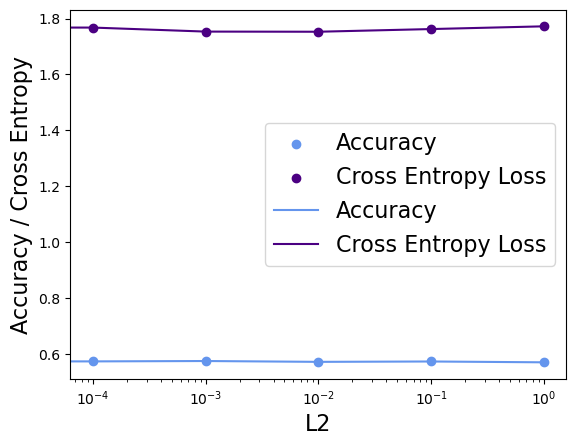

In [264]:
aux.graph(lambdas, acc, ce, "L2 vs Accuracy and Cross Entropy Loss", "L2", ["Accuracy", "Cross Entropy Loss"], scale='log', unite=True)

### Dropout
Dropout rate

hp: 0
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5676666666666667       avg ce =  1.7890068186506967
hp: 0.01
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5650000000000001       avg ce =  1.7902084877080455
hp: 0.1
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.568       avg ce =  1.7430738306844353
hp: 0.3
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Avg results: 
                      avg acc =  0.5840000000000001       avg ce =  1.6999570984235224
hp: 0.4
Early stopping triggered
Early stopping triggered
Early stopping trigg

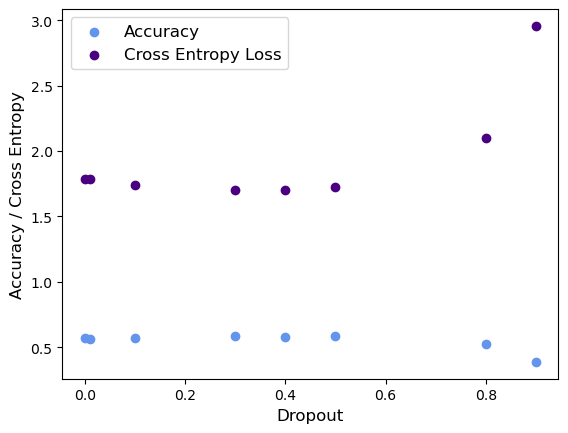

La menor pérdida fue:  1.6999570984235224 correspondiente al dropout rate:  0.3


In [273]:
importlib.reload(md)
importlib.reload(aux)

dropoutRates = [0, 0.01, 0.1, 0.3, 0.4, 0.5, 0.8, 0.9]

params = [["ReLU", "softmax"], [100], best_lr]
name = "Dropout"

losses_dropout = aux.cross_validation_mejora(X_train, y_train, name, dropoutRates, params)
acc_d = [x[0] for x in losses_dropout]
ce_d = [x[1] for x in losses_dropout]
best_drop = dropoutRates[ce_d.index(min(ce_d))]

aux.graph(dropoutRates, acc_d, ce_d, "Dropout vs Accuracy and Cross Entropy Loss", "Dropout", ["Accuracy", "Cross Entropy Loss"])

print("La menor pérdida fue: ", min(ce_d), "correspondiente al dropout rate: ", best_drop)

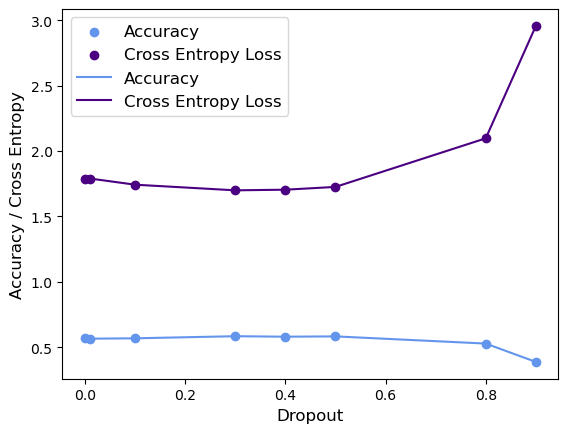

In [276]:
importlib.reload(aux)
aux.graph(dropoutRates, acc_d, ce_d, "Dropout vs Accuracy and Cross Entropy Loss", "Dropout", ["Accuracy", "Cross Entropy Loss"], scale='', unite=True)

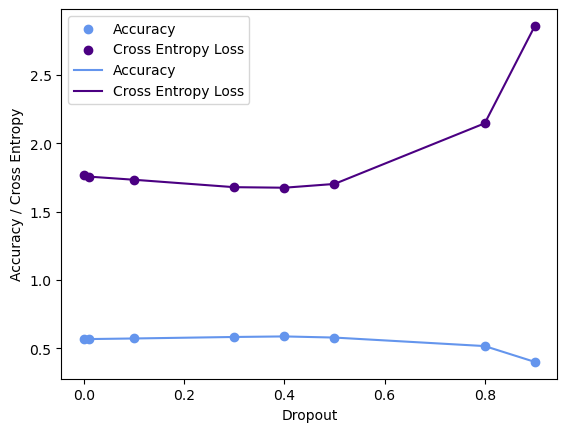

In [229]:
aux.graph(dropoutRates, acc_d, ce_d, "Dropout vs Accuracy and Cross Entropy Loss", "Dropout", ["Accuracy", "Cross Entropy Loss"], scale='', unite=True)

Vemos en el gráfico que  cuando el dropout es muy chico (la probabilidad de que se apague la neurona es muy baja) el modelo es bueno pero no tan bueno. Por otro lado, cuando es muy alto, la 

### Combinaciones de mejoras

Ahora que obtuvimos de manera greedy los mejores hiperparámetros para cada mejora, vamos a probar combinaciones de mejoras.

In [171]:
importlib.reload(md)
importlib.reload(aux)

# [Mini-batch SGD] + [ADAM] + [Regularización L2] + [Early stopping] + [Exponential LR schedule]
mejoras1 = {
    "Mini batch stochastic gradient descent": best_batch_size,
    "ADAM": best_adam_hp,
    "L2": best_l2,
    "Early stopping": 5,
    "Rate scheduling exponencial": best_dr
}
params = [["ReLU", "ReLU", "ReLU", "ReLU", "softmax"], [200, 250, 300, 500], best_lr, mejoras1]

results1, avg_acc1, avg_ce1 = aux.cross_validation(X_train, y_train, params)
print("La accuracy promedio fue:", avg_acc1)
print("La cross-entropy promedio fue:", avg_ce1)

acc:  0.04833333333333333
acc:  0.035
acc:  0.03333333333333333
acc:  0.041666666666666664
acc:  0.043333333333333335
La accuracy promedio fue: 0.04033333333333333
La cross-entropy promedio fue: 3.8627751297809225


In [ ]:
importlib.reload(md)
importlib.reload(aux)

# [Mini-batch SGD] + [ADAM] + [Dropout] + [Early stopping] + [Exponential LR schedule]
mejoras2 = {
    "Mini batch stochastic gradient descent": best_batch_size,
    "ADAM": best_adam_hp,
    "Dropout": best_drop,
    "Early stopping": 5,
    "Rate scheduling exponencial": best_dr
}
params = [["ReLU", "ReLU", "ReLU", "ReLU", "softmax"], [200, 250, 300, 500], best_lr, mejoras2]

results2, avg_acc2, avg_ce2 = aux.cross_validation(X_train, y_train, params)
print("La accuracy promedio fue:", avg_acc2)
print("La cross-entropy promedio fue:", avg_ce2)

acc:  0.03
acc:  0.025
acc:  0.03
acc:  0.04
acc:  0.03166666666666667
La accuracy promedio fue: 0.03133333333333334
La cross-entropy promedio fue: 3.890171113623274


In [ ]:
importlib.reload(md)
importlib.reload(aux)

# [Dropout] + [Early stopping] + [Exponential LR schedule]
mejoras3 = {
    "Early stopping": 5,
    "Dropout": best_drop,
    "Rate scheduling exponencial": best_dr
}
params = [["ReLU", "ReLU", "ReLU", "ReLU", "softmax"], [200, 250, 300, 500], best_lr, mejoras3]

results3, avg_acc3, avg_ce3 = aux.cross_validation(X_train, y_train, params)
print("La accuracy promedio fue:", avg_acc3)
print("La cross-entropy promedio fue:", avg_ce3)

acc:  0.03166666666666667
ce:  3.939946449927255
acc:  0.011666666666666667
ce:  3.949200045472995
acc:  0.03833333333333333
ce:  3.9433677119046298
acc:  0.03166666666666667
ce:  3.964024162484794
acc:  0.028333333333333332
ce:  3.926459354181628
La accuracy promedio fue: 0.028333333333333332
La cross-entropy promedio fue: 3.94459954479426


In [175]:
importlib.reload(md)
importlib.reload(aux)

mejoras4 = {
    "Early stopping": 5,
}
params = [["ReLU", "ReLU", "ReLU", "ReLU", "softmax"], [200, 250, 300, 500], best_lr, mejoras4]

results4, avg_acc4, avg_ce4 = aux.cross_validation(X_train, y_train, params)
print("La accuracy promedio fue:", avg_acc4)
print("La cross-entropy promedio fue:", avg_ce4)

Early stopping triggered
acc:  0.3933333333333333
ce:  2.420003477835768
Early stopping triggered
acc:  0.5033333333333333
ce:  2.0324308734129892
Early stopping triggered
acc:  0.5216666666666666
ce:  1.984375298514423
Early stopping triggered
acc:  0.39
ce:  2.4727932224913745
Early stopping triggered
acc:  0.2683333333333333
ce:  3.090157517928074
La accuracy promedio fue: 0.4153333333333332
La cross-entropy promedio fue: 2.3999520780365255


In [274]:
importlib.reload(md)
importlib.reload(aux)

mejoras5 = {
    "Early stopping": 5,
    "Dropout": best_drop,
}
print("Dropout: ", best_drop)
params = [["ReLU", "ReLU", "ReLU", "ReLU", "softmax"], [200, 250, 300, 500], best_lr, mejoras4]

results5, avg_acc5, avg_ce5 = aux.cross_validation(X_train, y_train, params)
print("La accuracy promedio fue:", avg_acc5)
print("La cross-entropy promedio fue:", avg_ce5)

Dropout:  0.3
Early stopping triggered
acc:  0.4
ce:  2.454710774740683
Early stopping triggered
acc:  0.4066666666666667
ce:  2.3954539023288595
Early stopping triggered
acc:  0.4066666666666667
ce:  2.4418539412910287
Early stopping triggered
acc:  0.5016666666666667
ce:  2.141460213490858
Early stopping triggered
acc:  0.45166666666666666
ce:  2.278693128433916
La accuracy promedio fue: 0.4333333333333334
La cross-entropy promedio fue: 2.3424343920570694


In [277]:
importlib.reload(md)
importlib.reload(aux)

mejoras6 = {
    "Early stopping": 5,
    "Dropout": best_drop,
    "Mini batch stochastic gradient descent": best_batch_size,
}
print("Dropout: ", best_drop)
params = [["ReLU", "ReLU", "ReLU", "ReLU", "softmax"], [200, 250, 300, 500], best_lr, mejoras4]

results6, avg_acc6, avg_ce6 = aux.cross_validation(X_train, y_train, params)
print("La accuracy promedio fue:", avg_acc6)
print("La cross-entropy promedio fue:", avg_ce6)

Dropout:  0.3
Early stopping triggered
acc:  0.47833333333333333
ce:  2.1174068140678126
Early stopping triggered
acc:  0.34
ce:  2.704208240566786
Early stopping triggered
acc:  0.44666666666666666
ce:  2.2740750261133105
Early stopping triggered
acc:  0.43833333333333335
ce:  2.360948671918142
Early stopping triggered
acc:  0.3933333333333333
ce:  2.445914039802836
La accuracy promedio fue: 0.41933333333333334
La cross-entropy promedio fue: 2.3805105584937776


In [275]:
# elegimos el m1 que dio las mejores losses
importlib.reload(md)
importlib.reload(mt)

best_acc = max(avg_acc1, avg_acc2, avg_acc3, avg_acc4, avg_acc5, avg_acc6)
best_ce = min(avg_ce1, avg_ce2, avg_ce3, avg_ce4, avg_ce5, avg_ce6)
print("La mejor accuracy fue:", best_acc, "con el modelo ", np.argmax([avg_acc1, avg_acc2, avg_acc3, avg_acc4, avg_acc5, avg_acc6])+1)
print("La mejor cross-entropy fue:", best_ce, "con el modelo ", np.argmin([avg_ce1, avg_ce2, avg_ce3, avg_ce4, avg_ce5, avg_ce6])+1)

# usamos cross entropy
best_model = np.argmin([avg_ce1, avg_ce2, avg_ce3, avg_ce4, avg_ce5, avg_ce6])
best_params = [mejoras1, mejoras2, mejoras3, mejoras4, mejoras5, mejoras6][best_model]

La mejor accuracy fue: 0.4333333333333334 con el modelo  5
La mejor cross-entropy fue: 2.3424343920570694 con el modelo  5


Epoch 0, Loss: 3.928359592021549
loss val: 1.3091957813158497
Epoch 10, Loss: 3.8006659502464184
loss val: 1.2751443084495067
Epoch 20, Loss: 3.746568134396256
loss val: 1.261040008797805
Epoch 30, Loss: 3.6869896671108884
loss val: 1.2446360786731432
Epoch 40, Loss: 3.6080026081086864
loss val: 1.2218779832772355
Epoch 50, Loss: 3.501741348610275
loss val: 1.1908605743798824
Epoch 60, Loss: 3.3623605514197656
loss val: 1.1493663103932343
Epoch 70, Loss: 3.2102522771311843
loss val: 1.1042353524355686
Epoch 80, Loss: 3.0556394261832724
loss val: 1.0592793548048904
Epoch 90, Loss: 2.904649666943186
loss val: 1.016349489088154
Epoch 100, Loss: 2.762900393658427
loss val: 0.9768820192447104
Epoch 110, Loss: 2.621959638799282
loss val: 0.9379398879109299
Epoch 120, Loss: 2.4972792909055475
loss val: 0.9040709287454252
Epoch 130, Loss: 2.3798042448394137
loss val: 0.8729590272786991
Epoch 140, Loss: 2.2740596357928595
loss val: 0.8458113056005657
Epoch 150, Loss: 2.1785743434834055
loss val

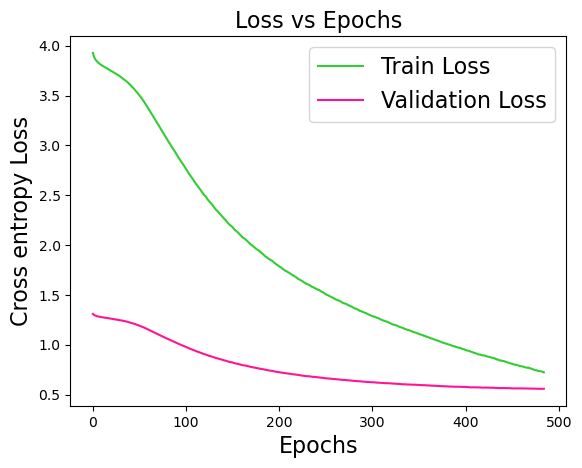

Accuracy: 0.5710
Cross Entropy: 1.6736


In [281]:
m1 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU","ReLU","ReLU", "softmax"], [200, 250, 300, 500], best_params)
mt.print_acc_ce(m1.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 4.012996277863257
loss val: 1.3363231204820734
Epoch 10, Loss: 3.783662026374446
loss val: 1.2691655881266273
Epoch 20, Loss: 3.6463514755418722
loss val: 1.2293887657568792
Epoch 30, Loss: 3.5033791964323524
loss val: 1.1884924872048468
Epoch 40, Loss: 3.3534159337886105
loss val: 1.1463932761626787
Epoch 50, Loss: 3.198538297550448
loss val: 1.1031010339670424
Epoch 60, Loss: 3.048885145014889
loss val: 1.0612821258806207
Epoch 70, Loss: 2.9074420940599914
loss val: 1.0214762278246836
Epoch 80, Loss: 2.774682491746904
loss val: 0.9840625888448149
Epoch 90, Loss: 2.652416131804638
loss val: 0.9504473425470921
Epoch 100, Loss: 2.5406111290193256
loss val: 0.9192581927310042
Epoch 110, Loss: 2.4379657882602555
loss val: 0.8906726113144032
Epoch 120, Loss: 2.34580230606589
loss val: 0.8651023783691055
Epoch 130, Loss: 2.2629919587121896
loss val: 0.842586371744225
Epoch 140, Loss: 2.18609677200358
loss val: 0.8219112148028603
Epoch 150, Loss: 2.1182795030787998
loss val: 0

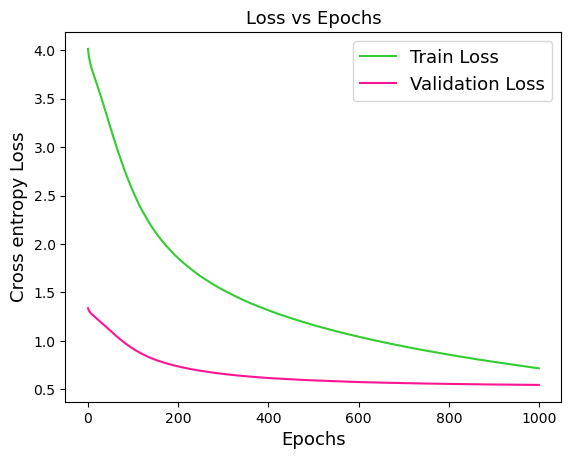

Accuracy: 0.5770
Cross Entropy: 1.6362


In [ ]:
# M1 final
m1 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "softmax"], [100], best_params)
mt.print_acc_ce(m1.forward_pass(X_val, False), y_val)

Viendo que no eran tan buenos los resultados, probamos volver a bajar las capas ya que habíamos probado los hiperparámetros de las mejoras para otra cantidad de capas. Aunque cuando solo probabamos arquitecturas dio mejor cuando habían más capas y más neuronas, al evaluar hiperparámetros para solo nua cpa de 100 nodos, entonces, las combinaciones de mejoras muestran que era mejor no combinar.

# 4) Desarrollo de una Red Neuronal con PyTorch

In [302]:
import pyTorch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

Utilizando PyTorch, entrenar una red neuronal con la arquitectura y los hiperparámetros hallados en el ejercicio anterior. Llmaremos a este modelo M2

In [304]:
print("Best params: ", best_params)

Best params:  {'Early stopping': 5, 'Dropout': 0.3}


Epoch 0, Loss: 3.9687, Val Loss: 3.9239
Epoch 10, Loss: 3.8229, Val Loss: 3.8056
Epoch 20, Loss: 3.7189, Val Loss: 3.7124
Epoch 30, Loss: 3.6069, Val Loss: 3.6144
Epoch 40, Loss: 3.4907, Val Loss: 3.5069
Epoch 50, Loss: 3.3558, Val Loss: 3.3929
Epoch 60, Loss: 3.2444, Val Loss: 3.2752
Epoch 70, Loss: 3.1274, Val Loss: 3.1581
Epoch 80, Loss: 3.0111, Val Loss: 3.0451
Epoch 90, Loss: 2.8780, Val Loss: 2.9380
Epoch 100, Loss: 2.8032, Val Loss: 2.8390
Epoch 110, Loss: 2.7063, Val Loss: 2.7486
Epoch 120, Loss: 2.6115, Val Loss: 2.6651
Epoch 130, Loss: 2.5424, Val Loss: 2.5891
Epoch 140, Loss: 2.4780, Val Loss: 2.5217
Epoch 150, Loss: 2.4104, Val Loss: 2.4598
Epoch 160, Loss: 2.3387, Val Loss: 2.4031
Epoch 170, Loss: 2.2897, Val Loss: 2.3521
Epoch 180, Loss: 2.2411, Val Loss: 2.3058
Epoch 190, Loss: 2.1881, Val Loss: 2.2631
Epoch 200, Loss: 2.1476, Val Loss: 2.2253
Epoch 210, Loss: 2.1058, Val Loss: 2.1902
Epoch 220, Loss: 2.0756, Val Loss: 2.1583
Epoch 230, Loss: 2.0521, Val Loss: 2.1291
Epo

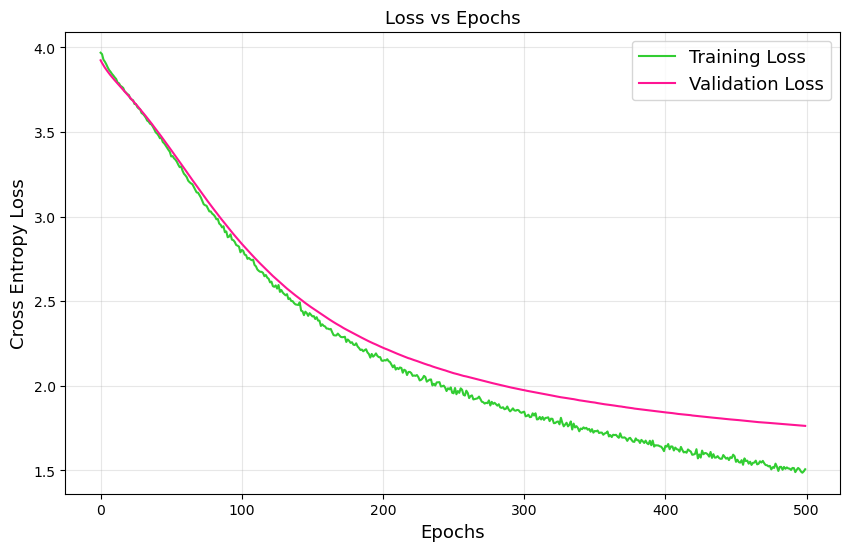

Accuracy: 0.5700
Cross Entropy: 1.7635


In [358]:
importlib.reload(md)
importlib.reload(mt)

mejoras = best_params.copy()
hidden_layers = [100]
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
m2 = md.NNTorch(
    input_size=input_size,
    hidden_layers=hidden_layers,
    output_size=output_size,
    mejora=mejoras
)

# Entrenamos
m2.fit(
    X=X_train,
    y=y_train,
    X_val=X_val,
    y_val=y_val,
    learning_rate=best_lr,
    epochs=500,
    # batch_size=best_batch_size,
    graph=True
)

y_pred = m2.predict_class(X_val)
probs = m2.predict_proba(X_val)

mt.print_acc_ce(probs, y_val)

### Modelo m3
Utilizando PyTorch, explorar cambios en la cantidad de capas ocultas y unidades
ocultas por capa, y determinar la configuración que funcione mejor. LLamaremos
a este modelo M3.

Epoch 0, Loss: 4.2062, Val Loss: 3.9212
Epoch 10, Loss: 3.9363, Val Loss: 3.8827
Epoch 20, Loss: 3.8949, Val Loss: 3.8715
Epoch 30, Loss: 3.8752, Val Loss: 3.8632
Epoch 40, Loss: 3.8677, Val Loss: 3.8529
Epoch 50, Loss: 3.8482, Val Loss: 3.8402
Epoch 60, Loss: 3.8337, Val Loss: 3.8235
Epoch 70, Loss: 3.8139, Val Loss: 3.7997
Epoch 80, Loss: 3.7897, Val Loss: 3.7732
Epoch 90, Loss: 3.7693, Val Loss: 3.7417
Epoch 100, Loss: 3.7339, Val Loss: 3.7065
Epoch 110, Loss: 3.7186, Val Loss: 3.6711
Epoch 120, Loss: 3.6836, Val Loss: 3.6290
Epoch 130, Loss: 3.6532, Val Loss: 3.5859
Epoch 140, Loss: 3.6118, Val Loss: 3.5409
Epoch 150, Loss: 3.5652, Val Loss: 3.4932
Epoch 160, Loss: 3.5147, Val Loss: 3.4447
Epoch 170, Loss: 3.4907, Val Loss: 3.3953
Epoch 180, Loss: 3.4580, Val Loss: 3.3504
Epoch 190, Loss: 3.4181, Val Loss: 3.3006
Epoch 200, Loss: 3.3586, Val Loss: 3.2496
Epoch 210, Loss: 3.3222, Val Loss: 3.2043
Epoch 220, Loss: 3.2894, Val Loss: 3.1570
Epoch 230, Loss: 3.2620, Val Loss: 3.1122
Epo

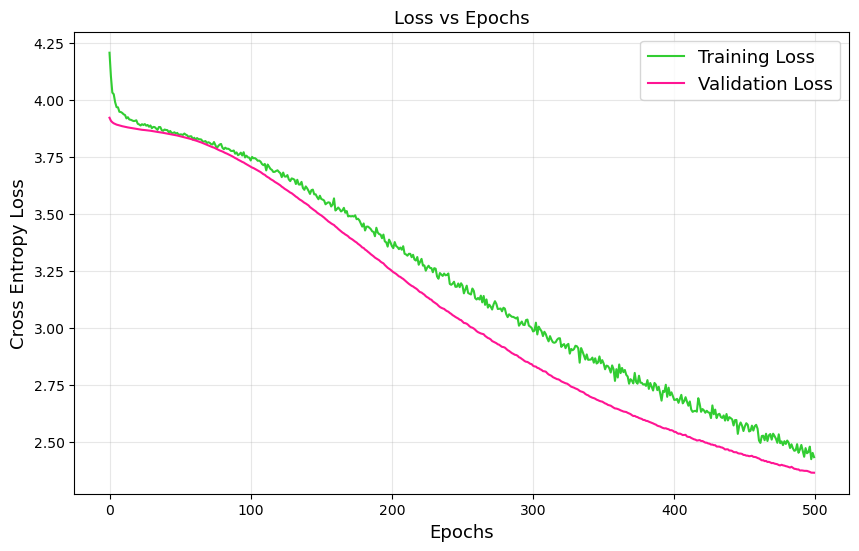

Accuracy: 0.3870
Cross Entropy: 2.3656


In [306]:
importlib.reload(md)
importlib.reload(mt)

mejoras = best_params.copy()
hidden_layers = [100, 100, 100, 100]
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
model = md.NNTorch(
    input_size=input_size,
    hidden_layers=hidden_layers,
    output_size=output_size,
    mejora=mejoras
)

# Entrenamos
model.fit(
    X=X_train,
    y=y_train,
    X_val=X_val,
    y_val=y_val, 
    learning_rate=best_lr,
    epochs=500,
    batch_size=best_batch_size,
    graph=True  
)

y_pred = model.predict_class(X_val)
probs = model.predict_proba(X_val)

mt.print_acc_ce(probs, y_val)

A este modelo le fue un poco peor asi que probamos con menos capas y más neuronas.

Epoch 0, Loss: 3.9550, Val Loss: 3.8872
Epoch 10, Loss: 3.5975, Val Loss: 3.5924
Epoch 20, Loss: 3.3084, Val Loss: 3.3461
Epoch 30, Loss: 3.0363, Val Loss: 3.1174
Epoch 40, Loss: 2.8111, Val Loss: 2.9097
Epoch 50, Loss: 2.5984, Val Loss: 2.7259
Epoch 60, Loss: 2.4193, Val Loss: 2.5689
Epoch 70, Loss: 2.2776, Val Loss: 2.4370
Epoch 80, Loss: 2.1432, Val Loss: 2.3276
Epoch 90, Loss: 2.0353, Val Loss: 2.2367
Epoch 100, Loss: 1.9345, Val Loss: 2.1607
Epoch 110, Loss: 1.8600, Val Loss: 2.0975
Epoch 120, Loss: 1.7908, Val Loss: 2.0446
Epoch 130, Loss: 1.7269, Val Loss: 1.9987
Epoch 140, Loss: 1.6728, Val Loss: 1.9603
Epoch 150, Loss: 1.6099, Val Loss: 1.9262
Epoch 160, Loss: 1.5767, Val Loss: 1.8980
Epoch 170, Loss: 1.5383, Val Loss: 1.8719
Epoch 180, Loss: 1.4959, Val Loss: 1.8493
Epoch 190, Loss: 1.4501, Val Loss: 1.8284
Epoch 200, Loss: 1.4265, Val Loss: 1.8100
Epoch 210, Loss: 1.3904, Val Loss: 1.7942
Epoch 220, Loss: 1.3751, Val Loss: 1.7785
Epoch 230, Loss: 1.3343, Val Loss: 1.7648
Epo

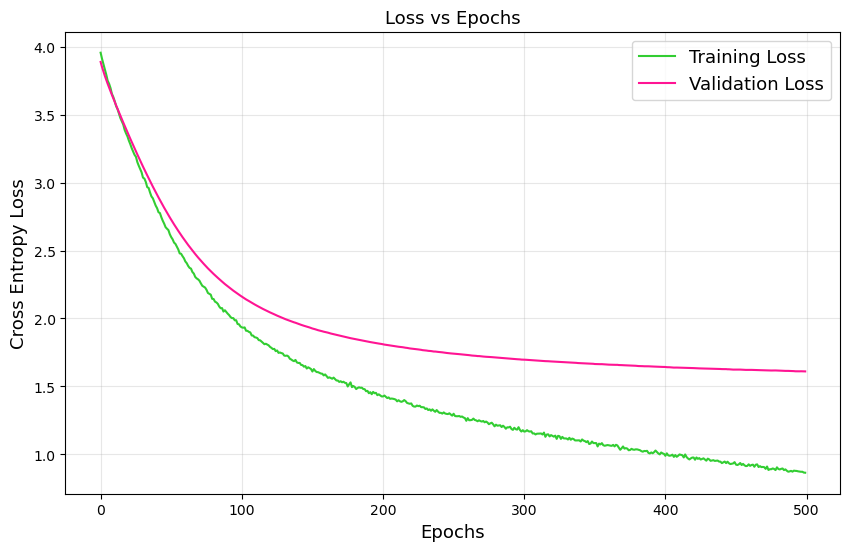

Accuracy: 0.5910
Cross Entropy: 1.6107


In [307]:
importlib.reload(md)
importlib.reload(mt)

mejoras = best_params.copy()
hidden_layers = [1000]
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
model = md.NNTorch(
    input_size=input_size,
    hidden_layers=hidden_layers,
    output_size=output_size,
    mejora=mejoras
)

# Entrenamos
model.fit(
    X=X_train, 
    y=y_train,
    X_val=X_val, 
    y_val=y_val, 
    learning_rate=best_lr,
    epochs=500, 
    # batch_size=best_batch_size,
    graph=True  
)

y_pred = model.predict_class(X_val)
probs = model.predict_proba(X_val)

mt.print_acc_ce(probs, y_val)

A este le fue mejor asi que nos vamos al extremo y probamos muy pocas neuronas.

Epoch 0, Loss: 3.9875, Val Loss: 3.9232
Epoch 10, Loss: 3.8591, Val Loss: 3.8747
Epoch 20, Loss: 3.8320, Val Loss: 3.8556
Epoch 30, Loss: 3.8171, Val Loss: 3.8399
Epoch 40, Loss: 3.7916, Val Loss: 3.8252
Epoch 50, Loss: 3.7683, Val Loss: 3.8094
Epoch 60, Loss: 3.7463, Val Loss: 3.7915
Epoch 70, Loss: 3.7232, Val Loss: 3.7708
Epoch 80, Loss: 3.7045, Val Loss: 3.7479
Epoch 90, Loss: 3.6756, Val Loss: 3.7237
Epoch 100, Loss: 3.6483, Val Loss: 3.6998
Epoch 110, Loss: 3.6329, Val Loss: 3.6776
Epoch 120, Loss: 3.6082, Val Loss: 3.6560
Epoch 130, Loss: 3.5766, Val Loss: 3.6350
Epoch 140, Loss: 3.5522, Val Loss: 3.6131
Epoch 150, Loss: 3.5171, Val Loss: 3.5914
Epoch 160, Loss: 3.5066, Val Loss: 3.5687
Epoch 170, Loss: 3.4645, Val Loss: 3.5469
Epoch 180, Loss: 3.4535, Val Loss: 3.5259
Epoch 190, Loss: 3.4354, Val Loss: 3.5037
Epoch 200, Loss: 3.4048, Val Loss: 3.4845
Epoch 210, Loss: 3.3862, Val Loss: 3.4647
Epoch 220, Loss: 3.3942, Val Loss: 3.4459
Epoch 230, Loss: 3.3580, Val Loss: 3.4264
Epo

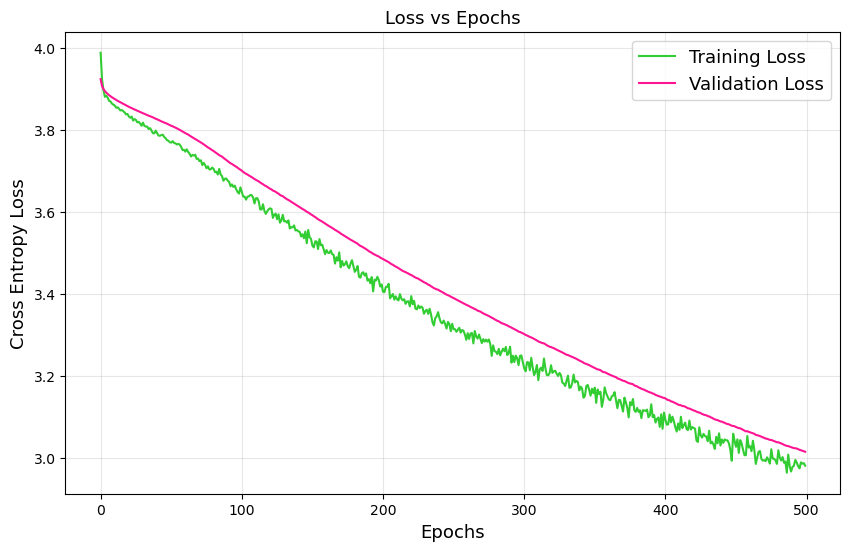

Accuracy: 0.2570
Cross Entropy: 3.0150


In [308]:
importlib.reload(md)
importlib.reload(mt)

mejoras = best_params.copy()
hidden_layers = [10]
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
model = md.NNTorch(
    input_size=input_size,
    hidden_layers=hidden_layers,
    output_size=output_size,
    mejora=mejoras
)

# Entrenamos
model.fit(
    X=X_train,
    y=y_train,  
    X_val=X_val, 
    y_val=y_val,  
    learning_rate=best_lr,
    epochs=500,  
    # batch_size=best_batch_size,
    graph=True 
)

y_pred = model.predict_class(X_val)
probs = model.predict_proba(X_val)

mt.print_acc_ce(probs, y_val)

Como era de esperar, no le fue tan bien. Por lo visto, se entiende que este modelo con estas mejoras funciona mejor con menos capas pero vamos a probar la idea de "just add more layers" a ver si en algun pnuto empieza mejorar.

Epoch 0, Loss: 29.0708, Val Loss: 3.8918
Epoch 10, Loss: 3.8924, Val Loss: 3.8917
Early stopping triggered at epoch 18


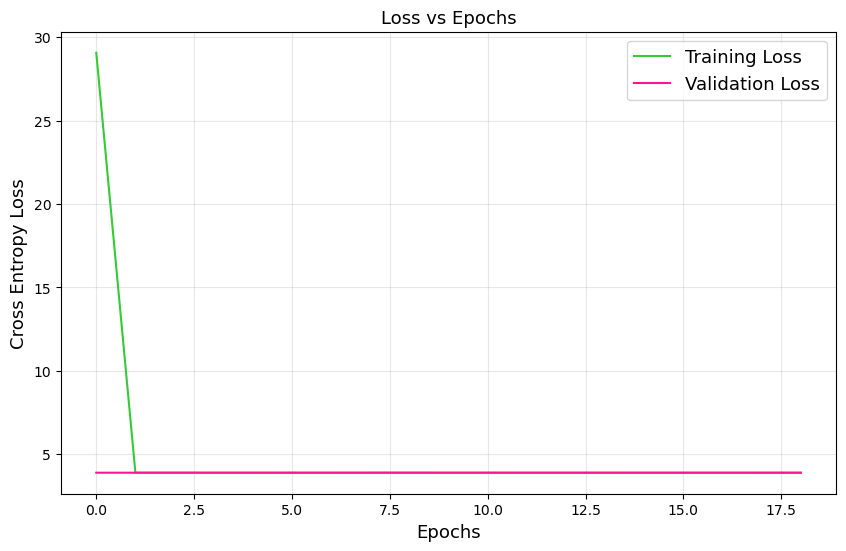

Accuracy: 0.0170
Cross Entropy: 3.8917


In [309]:
importlib.reload(md)
importlib.reload(mt)

mejoras = best_params.copy()
hidden_layers = [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
model = md.NNTorch(
    input_size=input_size,
    hidden_layers=hidden_layers,
    output_size=output_size,
    mejora=mejoras
)

# Entrenamos
model.fit(
    X=X_train,
    y=y_train,  
    X_val=X_val, 
    y_val=y_val,  
    learning_rate=best_lr,
    epochs=500,  
    # batch_size=best_batch_size,
    graph=True 
)

y_pred = model.predict_class(X_val)
probs = model.predict_proba(X_val)

mt.print_acc_ce(probs, y_val)

Vemos si era un problema de que habían muy pocas neuronas.

Epoch 0, Loss: 36.2680, Val Loss: 3.8925
Epoch 10, Loss: 3.9006, Val Loss: 3.8920
Epoch 20, Loss: 3.8946, Val Loss: 3.8919
Epoch 30, Loss: 3.8930, Val Loss: 3.8918
Epoch 40, Loss: 3.8893, Val Loss: 3.8917
Epoch 50, Loss: 3.8900, Val Loss: 3.8917
Epoch 60, Loss: 3.8887, Val Loss: 3.8917
Early stopping triggered at epoch 64


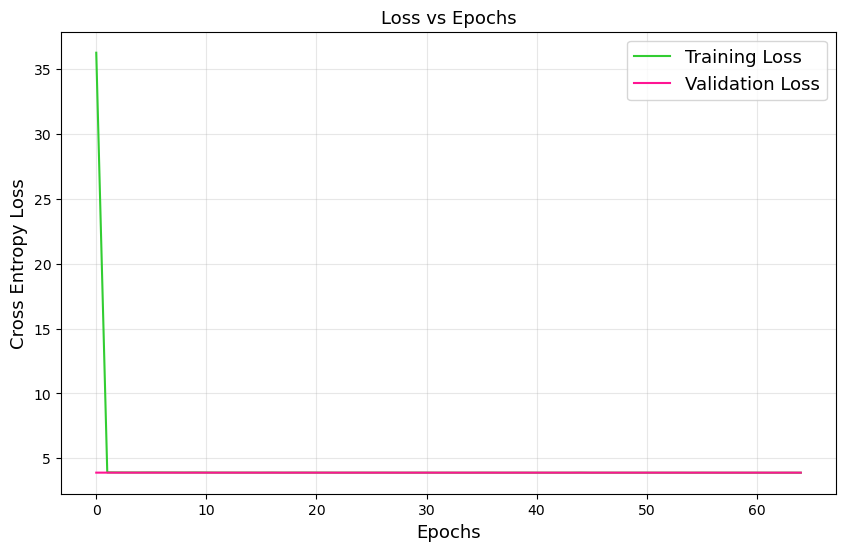

Accuracy: 0.0230
Cross Entropy: 3.8896


In [310]:
importlib.reload(md)
importlib.reload(mt)

mejoras = best_params.copy()
hidden_layers = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
model = md.NNTorch(
    input_size=input_size,
    hidden_layers=hidden_layers,
    output_size=output_size,
    mejora=mejoras
)

# Entrenamos
model.fit(
    X=X_train,
    y=y_train,  
    X_val=X_val, 
    y_val=y_val,  
    learning_rate=best_lr,
    epochs=500,  
    # batch_size=best_batch_size,
    graph=True 
)

y_pred = model.predict_class(X_val)
probs = model.predict_proba(X_val)

mt.print_acc_ce(probs, y_test)

Con este análisis, vemos que funciona mejor con menos capas y más neuronas así que lo llevamos al extremo.

(3000, 784)
Epoch 0, Loss: 3.9883, Val Loss: 3.7452
Epoch 10, Loss: 2.4554, Val Loss: 2.5760
Epoch 20, Loss: 1.9144, Val Loss: 2.1691
Epoch 30, Loss: 1.6196, Val Loss: 1.9826
Epoch 40, Loss: 1.4412, Val Loss: 1.8761
Epoch 50, Loss: 1.3047, Val Loss: 1.8031
Epoch 60, Loss: 1.1983, Val Loss: 1.7536
Epoch 70, Loss: 1.1160, Val Loss: 1.7181
Epoch 80, Loss: 1.0351, Val Loss: 1.6906
Epoch 90, Loss: 0.9700, Val Loss: 1.6668
Epoch 100, Loss: 0.9166, Val Loss: 1.6511
Epoch 110, Loss: 0.8686, Val Loss: 1.6343
Epoch 120, Loss: 0.8188, Val Loss: 1.6264
Epoch 130, Loss: 0.7791, Val Loss: 1.6168
Epoch 140, Loss: 0.7397, Val Loss: 1.6092
Epoch 150, Loss: 0.7090, Val Loss: 1.6041
Epoch 160, Loss: 0.6719, Val Loss: 1.5990
Epoch 170, Loss: 0.6432, Val Loss: 1.5936
Epoch 180, Loss: 0.6199, Val Loss: 1.5902
Early stopping triggered at epoch 188


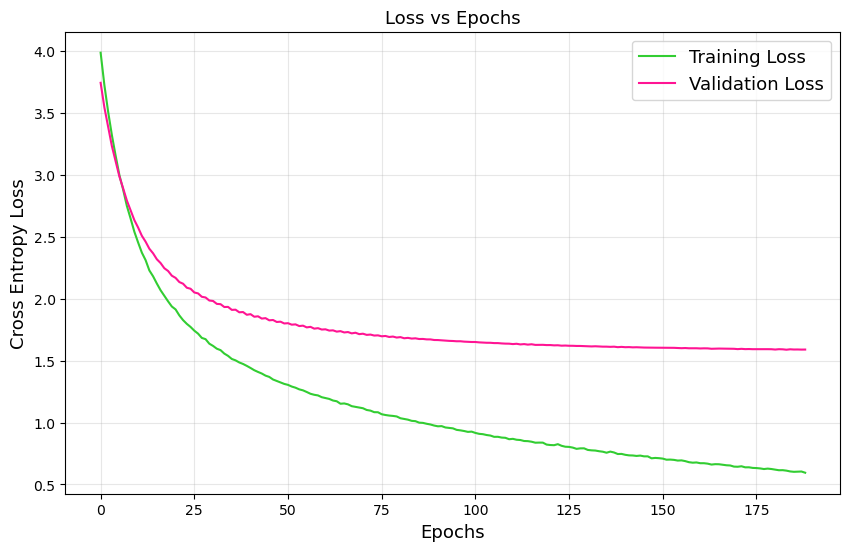

Accuracy: 0.6050
Cross Entropy: 1.5901


In [311]:
importlib.reload(md)
importlib.reload(mt)

print(X_train.shape)
mejoras = best_params.copy()
hidden_layers = [10000]
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
model = md.NNTorch(
    input_size=input_size,
    hidden_layers=hidden_layers,
    output_size=output_size,
    mejora=mejoras
)

# Entrenamos
model.fit(
    X=X_train,
    y=y_train,
    X_val=X_val,
    y_val=y_val,
    learning_rate=best_lr,
    epochs=500,
    # batch_size=best_batch_size,
    graph=True
)

y_pred = model.predict_class(X_val)
probs = model.predict_proba(X_val)

mt.print_acc_ce(probs, y_val)

In [343]:
importlib.reload(md)
importlib.reload(mt)

acc = []
ce = []
neurs = [10, 100, 500, 1000, 5000, 10000]

for n in neurs:
    print("Cantidad de neuronas: ", n)
    hidden_layers = [n]
    input_size = X_train.shape[1]
    output_size = len(np.unique(y_train))
    model = md.NNTorch(
        input_size=input_size,
        hidden_layers=hidden_layers,
        output_size=output_size,
        mejora=mejoras
    )

    # Entrenamos
    model.fit(
        X=X_train, 
        y=y_train,
        X_val=X_val,
        y_val=y_val,
        learning_rate=best_lr,
        epochs=500,
        # batch_size=best_batch_size,
        graph=False
    )

    y_pred = model.predict_class(X_val)
    probs = model.predict_proba(X_val)

    acc.append(mt.accuracy(y_pred, y_val))
    ce.append(mt.cross_entropy(y_val, probs))
    print("Accuracy: ", acc[-1])
    print("Cross-entropy: ", ce[-1])


Cantidad de neuronas:  10
Accuracy:  0.244
Cross-entropy:  3.025994
Cantidad de neuronas:  100
Accuracy:  0.57
Cross-entropy:  1.7844963
Cantidad de neuronas:  500
Accuracy:  0.598
Cross-entropy:  1.6198637
Cantidad de neuronas:  1000
Accuracy:  0.6
Cross-entropy:  1.610617
Cantidad de neuronas:  5000
Accuracy:  0.606
Cross-entropy:  1.6003017
Cantidad de neuronas:  10000
Accuracy:  0.605
Cross-entropy:  1.5861521


Buscamos de manera iterativa sin cross validation el efecto de la cantidad de neuronas en un modelo de una sola capa oculta.

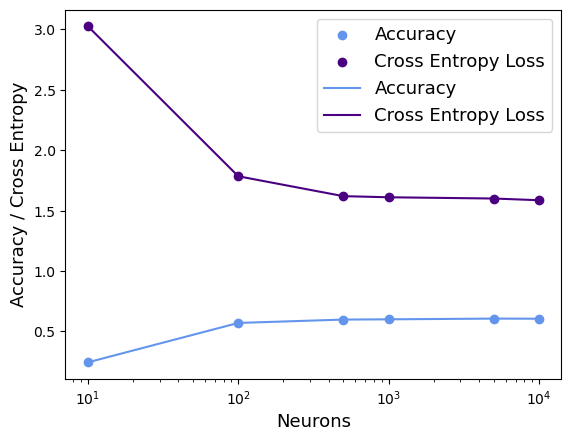

La mejor cross entropy fue:  1.5861521 con el modelo de  10000 neuronas
Best neurs:  1000


In [344]:
# graficamos
importlib.reload(aux)
aux.graph(neurs, acc, ce, "Neurons vs Accuracy and Cross Entropy Loss", "Neurons", ["Accuracy", "Cross Entropy Loss"], scale = 'log', unite = True)

best_neurs = neurs[ce.index(min(ce))]
print("La mejor cross entropy fue: ", min(ce), "con el modelo de ", best_neurs, "neuronas")

best_neurs = 1000
print("Best neurs: ", best_neurs)

Con esta cantidad vemos si se optimiza con más capas.

In [345]:
importlib.reload(md)
importlib.reload(mt)

acc = []
ce = []
capas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Best neurons: ", best_neurs)

for c in capas:
    print("Cantidad de capas: ", c)
    hidden_layers = [best_neurs] * c
    input_size = X_train.shape[1]
    output_size = len(np.unique(y_train))
    model = md.NNTorch(
        input_size=input_size,
        hidden_layers=hidden_layers,
        output_size=output_size,
        mejora=mejoras
    )

    # Entrenamos
    model.fit(
        X=X_train,
        y=y_train,
        X_val=X_val,
        y_val=y_val,
        learning_rate=best_lr,
        epochs=500,
        batch_size=best_batch_size,
        graph=False
    )

    y_pred = model.predict_class(X_val)
    probs = model.predict_proba(X_val)

    acc.append(mt.accuracy(y_pred, y_val))
    ce.append(mt.cross_entropy(y_val, probs))
    print("Accuracy: ", acc[-1])
    print("Cross-entropy: ", ce[-1])


Best neurons:  1000
Cantidad de capas:  1
Accuracy:  0.599
Cross-entropy:  1.6002938
Cantidad de capas:  2
Accuracy:  0.611
Cross-entropy:  1.5611153
Cantidad de capas:  3
Accuracy:  0.617
Cross-entropy:  1.4936163
Cantidad de capas:  4
Accuracy:  0.601
Cross-entropy:  1.5655575
Cantidad de capas:  5
Accuracy:  0.593
Cross-entropy:  1.5663722
Cantidad de capas:  6
Accuracy:  0.573
Cross-entropy:  1.6355356
Cantidad de capas:  7
Accuracy:  0.494
Cross-entropy:  1.8560295
Cantidad de capas:  8
Accuracy:  0.324
Cross-entropy:  2.411663
Cantidad de capas:  9
Accuracy:  0.034
Cross-entropy:  3.8854036
Cantidad de capas:  10
Accuracy:  0.021
Cross-entropy:  3.8895078


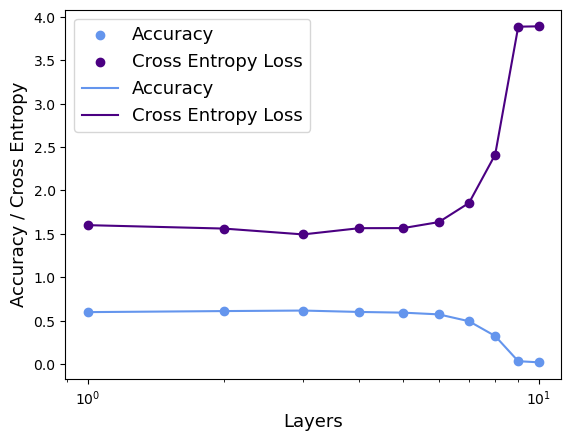

La mejor cross entropy fue:  1.4936163 con el modelo de  3 capas
La mejor accuracy fue:  0.617 con el modelo de  3 capas


In [346]:
importlib.reload(aux)
aux.graph(capas, acc, ce, "Layers vs Accuracy and Cross Entropy Loss", "Layers", ["Accuracy", "Cross Entropy Loss"], scale = 'log', unite = True)
best_layers = capas[ce.index(min(ce))]
print("La mejor cross entropy fue: ", min(ce), "con el modelo de ", best_layers, "capas")
print("La mejor accuracy fue: ", max(acc), "con el modelo de ", best_layers, "capas")

probamos la optima cantidad de capas con la optima de neuronas a ver si mejora

Cantidad de capas:  3
Cantidad de neuronas:  1000
Epoch 0, Loss: 4.0973, Val Loss: 3.9148
Epoch 10, Loss: 3.7743, Val Loss: 3.6894
Epoch 20, Loss: 3.5553, Val Loss: 3.4703
Epoch 30, Loss: 3.3232, Val Loss: 3.2078
Epoch 40, Loss: 3.0651, Val Loss: 2.9191
Epoch 50, Loss: 2.8172, Val Loss: 2.6466
Epoch 60, Loss: 2.5846, Val Loss: 2.4168
Epoch 70, Loss: 2.3621, Val Loss: 2.2380
Epoch 80, Loss: 2.2129, Val Loss: 2.1051
Epoch 90, Loss: 2.0716, Val Loss: 2.0046
Epoch 100, Loss: 1.9719, Val Loss: 1.9331
Epoch 110, Loss: 1.9042, Val Loss: 1.8697
Epoch 120, Loss: 1.7907, Val Loss: 1.8202
Epoch 130, Loss: 1.7212, Val Loss: 1.7844
Epoch 140, Loss: 1.6523, Val Loss: 1.7505
Epoch 150, Loss: 1.6008, Val Loss: 1.7176
Epoch 160, Loss: 1.5264, Val Loss: 1.6908
Epoch 170, Loss: 1.4647, Val Loss: 1.6729
Epoch 180, Loss: 1.4297, Val Loss: 1.6496
Epoch 190, Loss: 1.3846, Val Loss: 1.6327
Epoch 200, Loss: 1.3237, Val Loss: 1.6141
Epoch 210, Loss: 1.2982, Val Loss: 1.5992
Epoch 220, Loss: 1.2622, Val Loss: 1.

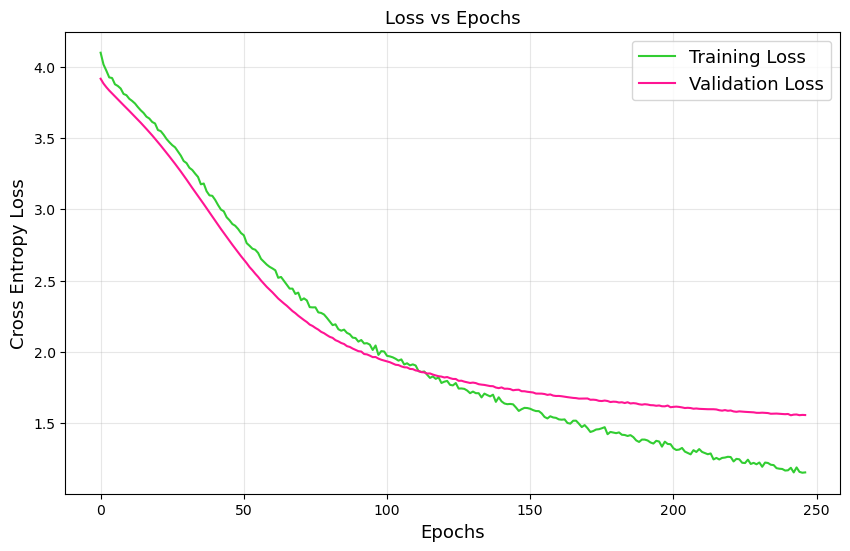

Accuracy:  0.608
Cross-entropy:  1.5568088


<module 'auxiliares' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP3\\src\\auxiliares.py'>

In [349]:
importlib.reload(md)
importlib.reload(mt)

print("Cantidad de capas: ", best_layers)
print("Cantidad de neuronas: ", best_neurs)
hidden_layers = [best_neurs] * best_layers
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
m3 = md.NNTorch(
    input_size=input_size,
    hidden_layers=hidden_layers,
    output_size=output_size,
    mejora=mejoras
)

# Entrenamos
m3.fit(
    X=X_train,
    y=y_train,
    X_val=X_val,
    y_val=y_val,
    learning_rate=best_lr,
    epochs=500,
    batch_size=best_batch_size,
    graph=True
)

y_pred = m3.predict_class(X_val)
probs = m3.predict_proba(X_val)

print("Accuracy: ", mt.accuracy(y_pred, y_val))
print("Cross-entropy: ", mt.cross_entropy(y_val, probs))

importlib.reload(aux)

### Overfitting M4

Utilizando PyTorch, encontrar una arquitectura (capas ocultas y unidades por
capa) que produzca overfitting. Llamaremos a este modelo M4

Veamos sin mejoras

Epoch 0, Loss: 3.9581, Val Loss: 3.9469
Epoch 10, Loss: 3.8335, Val Loss: 3.8510
Epoch 20, Loss: 3.7417, Val Loss: 3.7764
Epoch 30, Loss: 3.6195, Val Loss: 3.6690
Epoch 40, Loss: 3.4414, Val Loss: 3.5074
Epoch 50, Loss: 3.2047, Val Loss: 3.2887
Epoch 60, Loss: 2.9377, Val Loss: 3.0498
Epoch 70, Loss: 2.6765, Val Loss: 2.8232
Epoch 80, Loss: 2.4403, Val Loss: 2.6266
Epoch 90, Loss: 2.3823, Val Loss: 2.7347
Epoch 100, Loss: 2.1687, Val Loss: 2.4185
Epoch 110, Loss: 2.0242, Val Loss: 2.3067
Epoch 120, Loss: 1.9669, Val Loss: 2.2865
Epoch 130, Loss: 1.8031, Val Loss: 2.1727
Epoch 140, Loss: 1.7906, Val Loss: 2.1045
Epoch 150, Loss: 1.6505, Val Loss: 2.0713
Epoch 160, Loss: 1.5544, Val Loss: 2.0051
Epoch 170, Loss: 1.4766, Val Loss: 1.9586
Epoch 180, Loss: 1.4329, Val Loss: 1.9748
Epoch 190, Loss: 1.4380, Val Loss: 1.9972
Epoch 200, Loss: 1.3266, Val Loss: 1.9032
Epoch 210, Loss: 1.3123, Val Loss: 1.8972
Epoch 220, Loss: 1.2149, Val Loss: 1.8340
Epoch 230, Loss: 1.1562, Val Loss: 1.8182
Epo

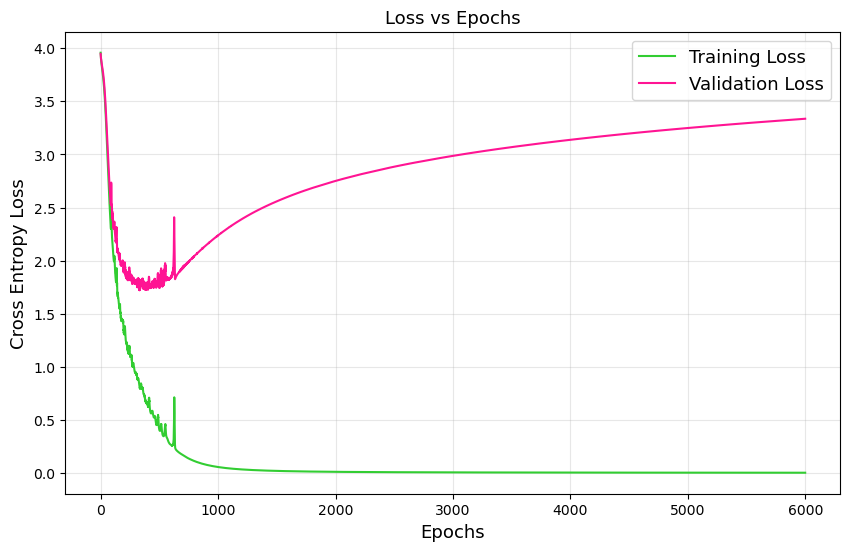

Accuracy: 0.5910
Cross Entropy: 3.3233


In [354]:
importlib.reload(md)
importlib.reload(mt)

mejoras = {
}
hidden_layers = [100, 100, 100]
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))
m4_ = md.NNTorch(
    input_size=input_size,
    hidden_layers=hidden_layers,
    output_size=output_size,
    mejora=mejoras
)

# Entrenamos
m4_.fit(
    X=X_train, 
    y=y_train, 
    X_val=X_val,
    y_val=y_val,  
    learning_rate = 0.1,
    epochs=6000,
    # batch_size=best_batch_size,
    graph=True  
)

y_pred = m4_.predict_class(X_val)
probs = m4_.predict_proba(X_val)

mt.print_acc_ce(probs, y_val)

Comparar la performance sobre el conjunto de test de los siguientes cuatro modelos:

a) El modelo base de implementación propia (M0).

b) La mejor arquitectura obtenida con la implementación propia (M1).

c) Modelo en PyTorch, usando la misma arquiterctura e hiperparámetros que
en la implementación propia (M2).

d) La mejor arquitectura obtenida en PyTorch (M3).

e) Una arquitectura en PyTorch con sobreajuste (M4).

In [359]:
pred_m0 = m0.forward_pass(X_test, False)
pred_m1 = m1.forward_pass(X_test, False)
pred_m2 = m2.predict_proba(X_test)
pred_m3 = m3.predict_proba(X_test)
pred_m4 = m4_.predict_proba(X_test)

importlib.reload(mt)
print("-"*20, "M0", "-"*20)
mt.print_acc_ce(pred_m0, y_test)
print("-"*20, "M1", "-"*20)
mt.print_acc_ce(pred_m1, y_test)
print("-"*20, "M2", "-"*20)
mt.print_acc_ce(pred_m2, y_test)
print("-"*20, "M3", "-"*20)
mt.print_acc_ce(pred_m3, y_test)
print("-"*20, "M4", "-"*20)
mt.print_acc_ce(pred_m4, y_test)

-------------------- M0 --------------------
Accuracy: 0.5830
Cross Entropy: 1.9335
-------------------- M1 --------------------
Accuracy: 0.5940
Cross Entropy: 1.5504
-------------------- M2 --------------------
Accuracy: 0.5870
Cross Entropy: 1.6789
-------------------- M3 --------------------
Accuracy: 0.6100
Cross Entropy: 1.4870
-------------------- M4 --------------------
Accuracy: 0.5950
Cross Entropy: 3.3296


In [361]:
# graficamos los entrenamientos de m0, m1, m2, m3 y m4 juntos hasta 1000 epochs
importlib.reload(aux)
import matplotlib.pyplot as plt

train_m0 = m0.losses[:1000]
train_m1 = m1.losses[:1000]
train_m2 = m2.train_losses[:1000]
train_m3 = m3.train_losses[:1000]
train_m4 = m4_.train_losses[:1000]
train_m0_val = m0.losses_val[:1000]
train_m1_val = m1.losses_val[:1000]
train_m2_val = m2.val_losses[:1000]
train_m3_val = m3.val_losses[:1000]
train_m4_val = m4_.val_losses[:1000]

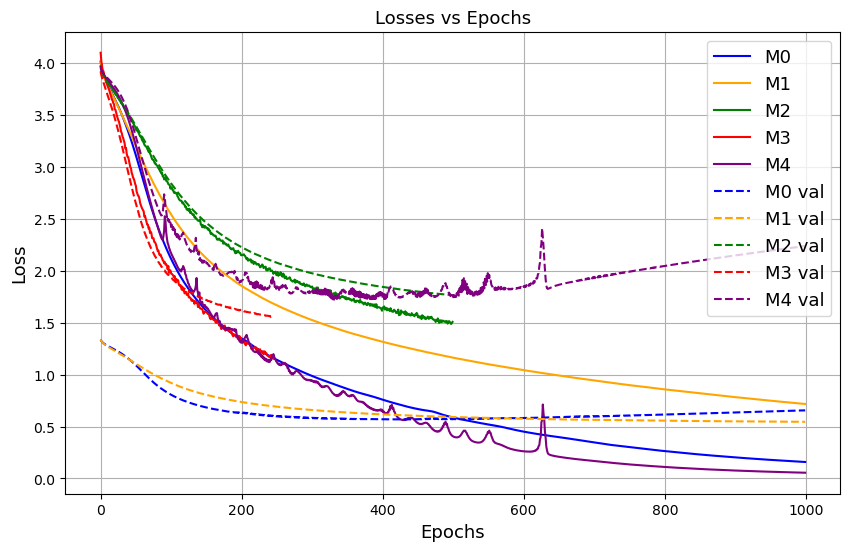

In [362]:
fs = 13 # font size
plt.figure(figsize=(10, 6))
plt.plot(train_m0, label="M0", color='blue')
plt.plot(train_m1, label="M1", color='orange')
plt.plot(train_m2, label="M2", color='green')
plt.plot(train_m3, label="M3", color='red')
plt.plot(train_m4, label="M4", color='purple')
plt.plot(train_m0_val, label="M0 val", color='blue', linestyle='dashed')
plt.plot(train_m1_val, label="M1 val", color='orange', linestyle='dashed')
plt.plot(train_m2_val, label="M2 val", color='green', linestyle='dashed')
plt.plot(train_m3_val, label="M3 val", color='red', linestyle='dashed')
plt.plot(train_m4_val, label="M4 val", color='purple', linestyle='dashed')
plt.title("Losses vs Epochs", fontsize=fs)
plt.xlabel("Epochs", fontsize=fs)
plt.ylabel("Loss", fontsize=fs)
plt.legend(fontsize=fs)
plt.grid()
plt.show()


# Ejercicio 5
Utilizando el modelo que considere que sea el mejor, predecir las probabilidades
a-posteriori de cada clase del dataset X_COMP.npy y generar un archivo .csv
con las predicciones llamado Apellido_Nombre_predicciones.csv.

El archivo predicciones.csv debe tener una fila por muestra y las columnas deben
ser las probabilidades a posteriori de cada clase.

In [363]:
# X_COMP
# usamos el modelo m3
importlib.reload(md)
X_COMP = ds.normalize(X_COMP)
pred_comp = m3.predict_proba(X_COMP)


df_pred = pd.DataFrame(
    pred_comp,
    columns=[f'Clase_{i}' for i in range(pred_comp.shape[1])]
)

np.savetxt('Marolda_Felicitas_Predicciones.csv', 
           pred_comp, 
           delimiter=',', 
           header='Predicciones', 
           comments='')

df_pred.to_csv(
    'Marolda_Felicitas_Predicciones.csv',
    index=False,
)
